In [84]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns
from sklearn.impute import SimpleImputer

In [316]:
#Read
df = pd.read_table('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes',sep=r'\s+\d+:', engine='python', header=None)

In [317]:
#rename
df.columns = ['label', 'Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Specify the columns to impute
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness','BMI']

# Replace 0 with NaN in the specified columns
df[columns_to_impute] = df[columns_to_impute].replace(0, np.nan)


df.loc[df['label'] == -1, 'label'] = 0

# Initialize the imputer (e.g., using the mean strategy)
imputer = SimpleImputer(strategy='mean')

# Apply the imputer
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)



#df.drop(columns=['SkinThickness', 'BloodPressure'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   label                     768 non-null    float64
 1   Pregnancies               768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             768 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [320]:
df.describe()

,label,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.651042,3.845052,121.686763,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885
std,0.476951,3.369578,30.435949,12.096346,8.790942,115.244002,6.875151,0.331329,11.760232
min,0.000000,0.000000,44.000000,24.000000,7.000000,0.000000,18.200001,0.078000,21.000000
25%,0.000000,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000
50%,1.000000,3.000000,117.000000,72.202592,29.153420,30.500000,32.400002,0.372500,29.000000
75%,1.000000,6.000000,140.250000,80.000000,32.000000,127.250000,36.599998,0.626250,41.000000
max,1.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.099998,2.420000,81.000000


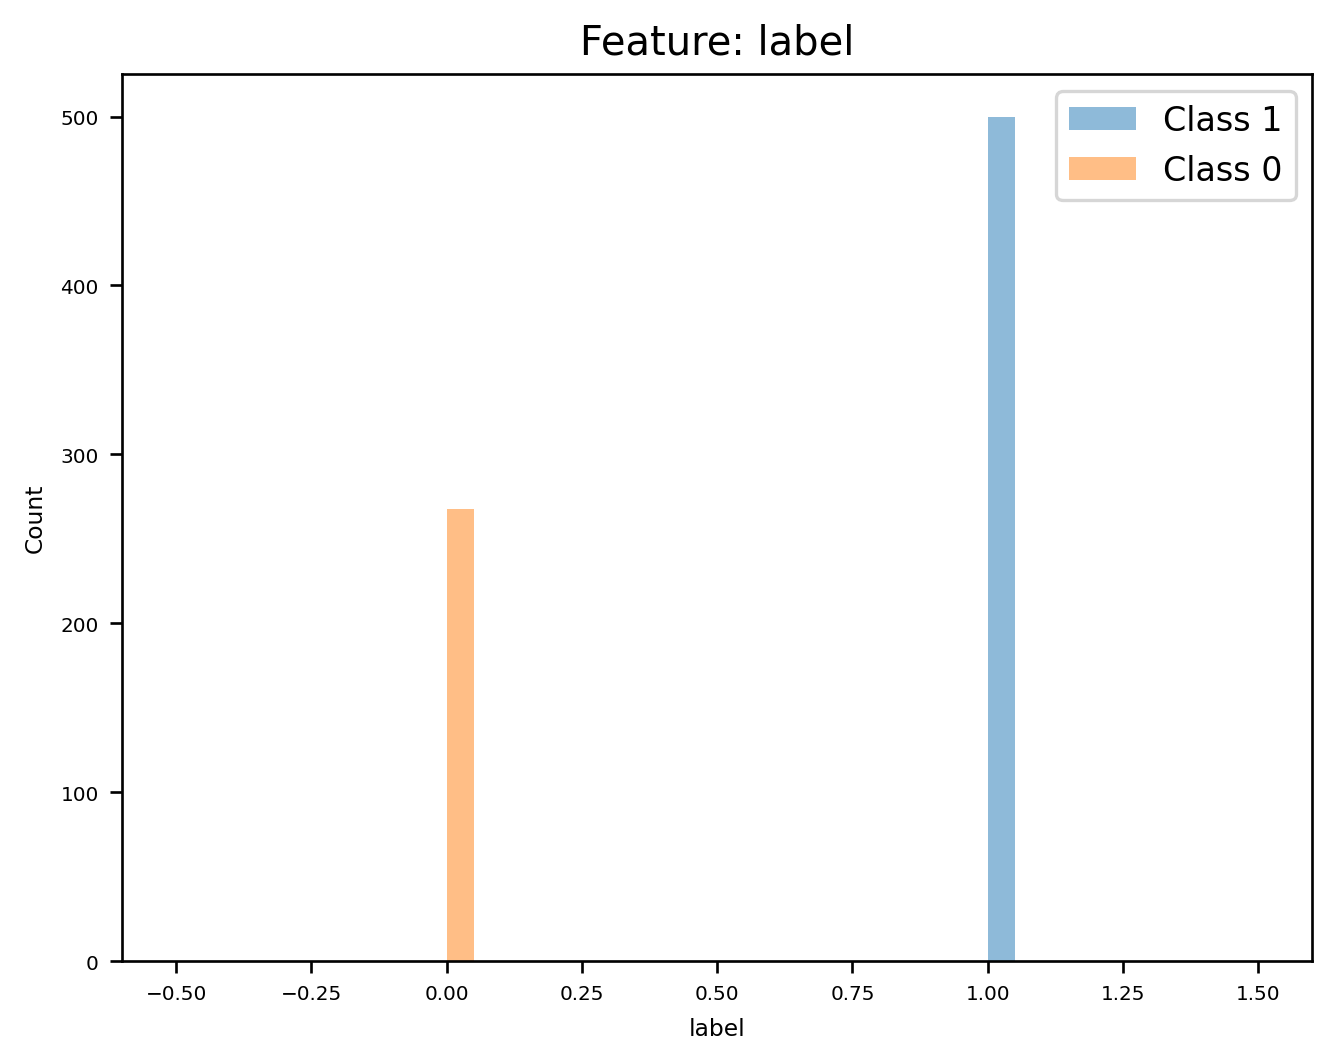

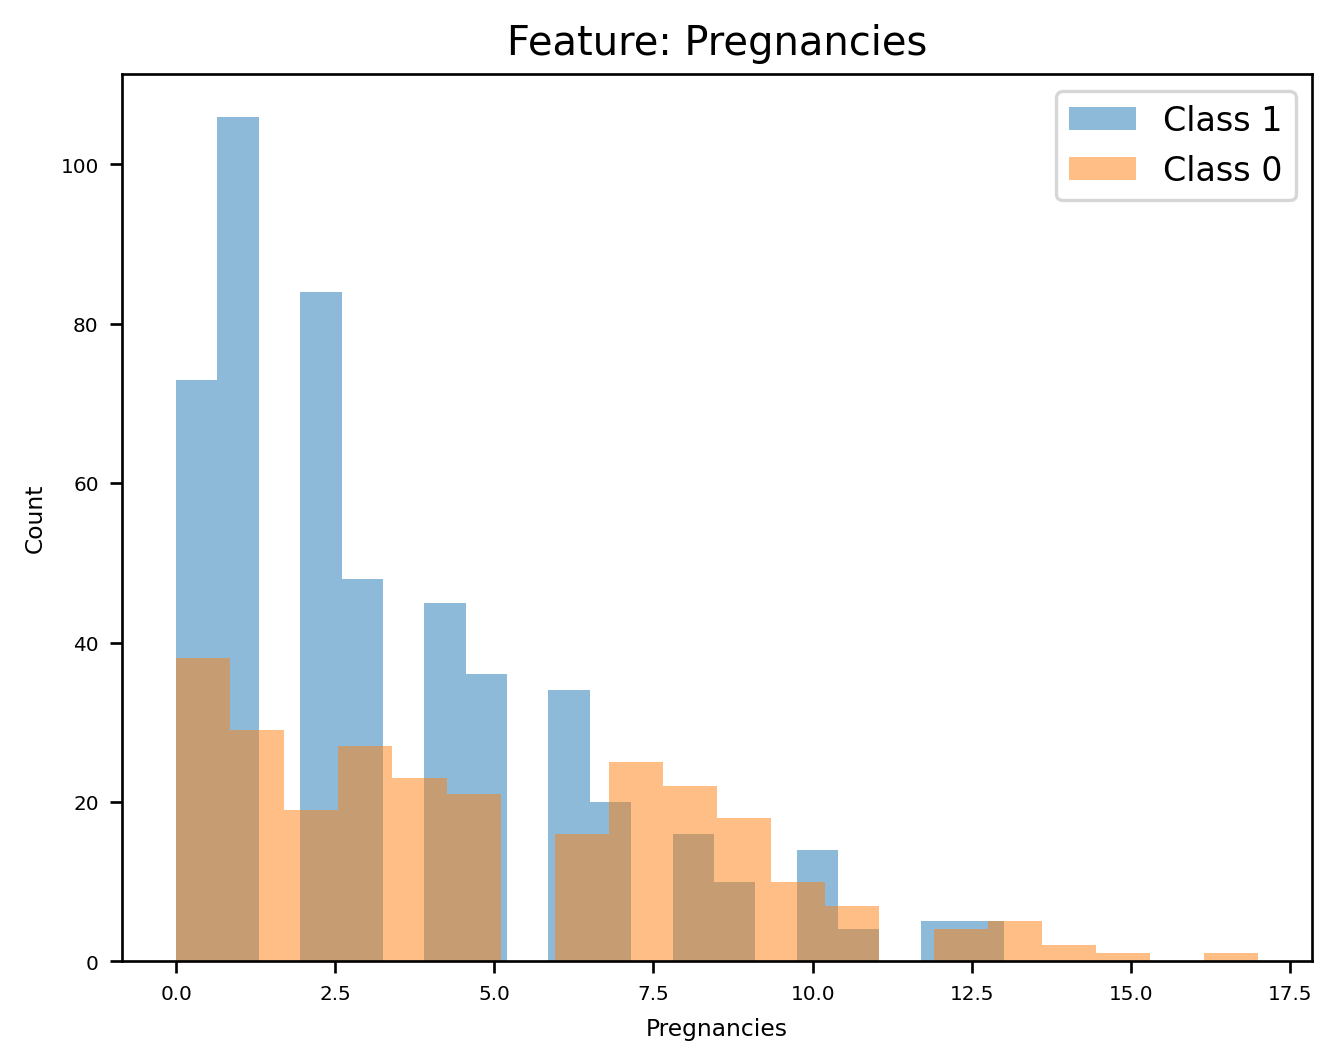

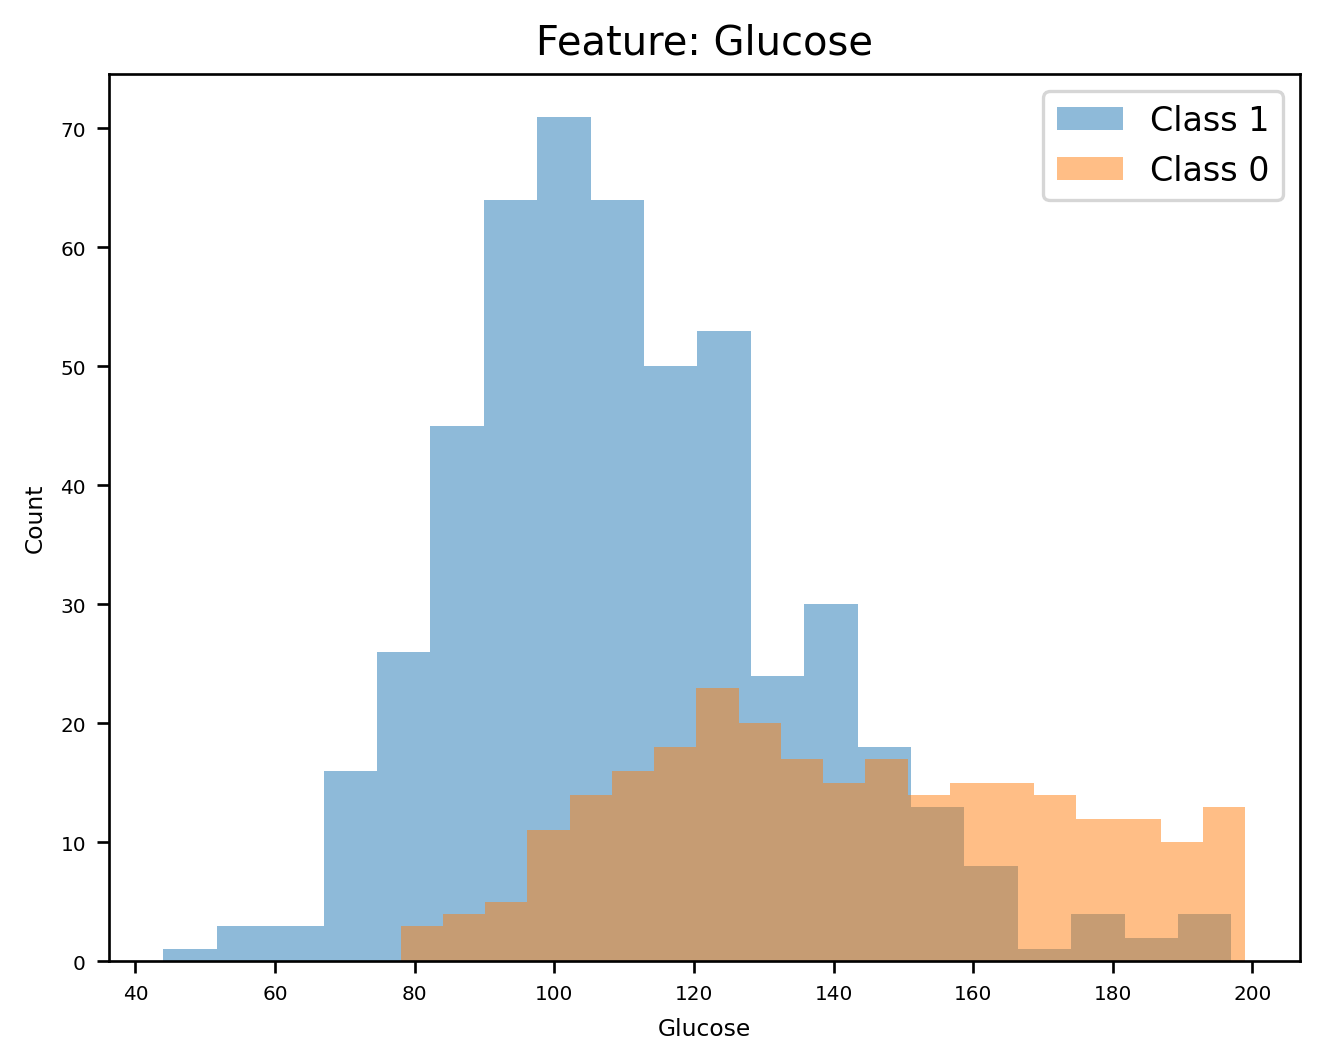

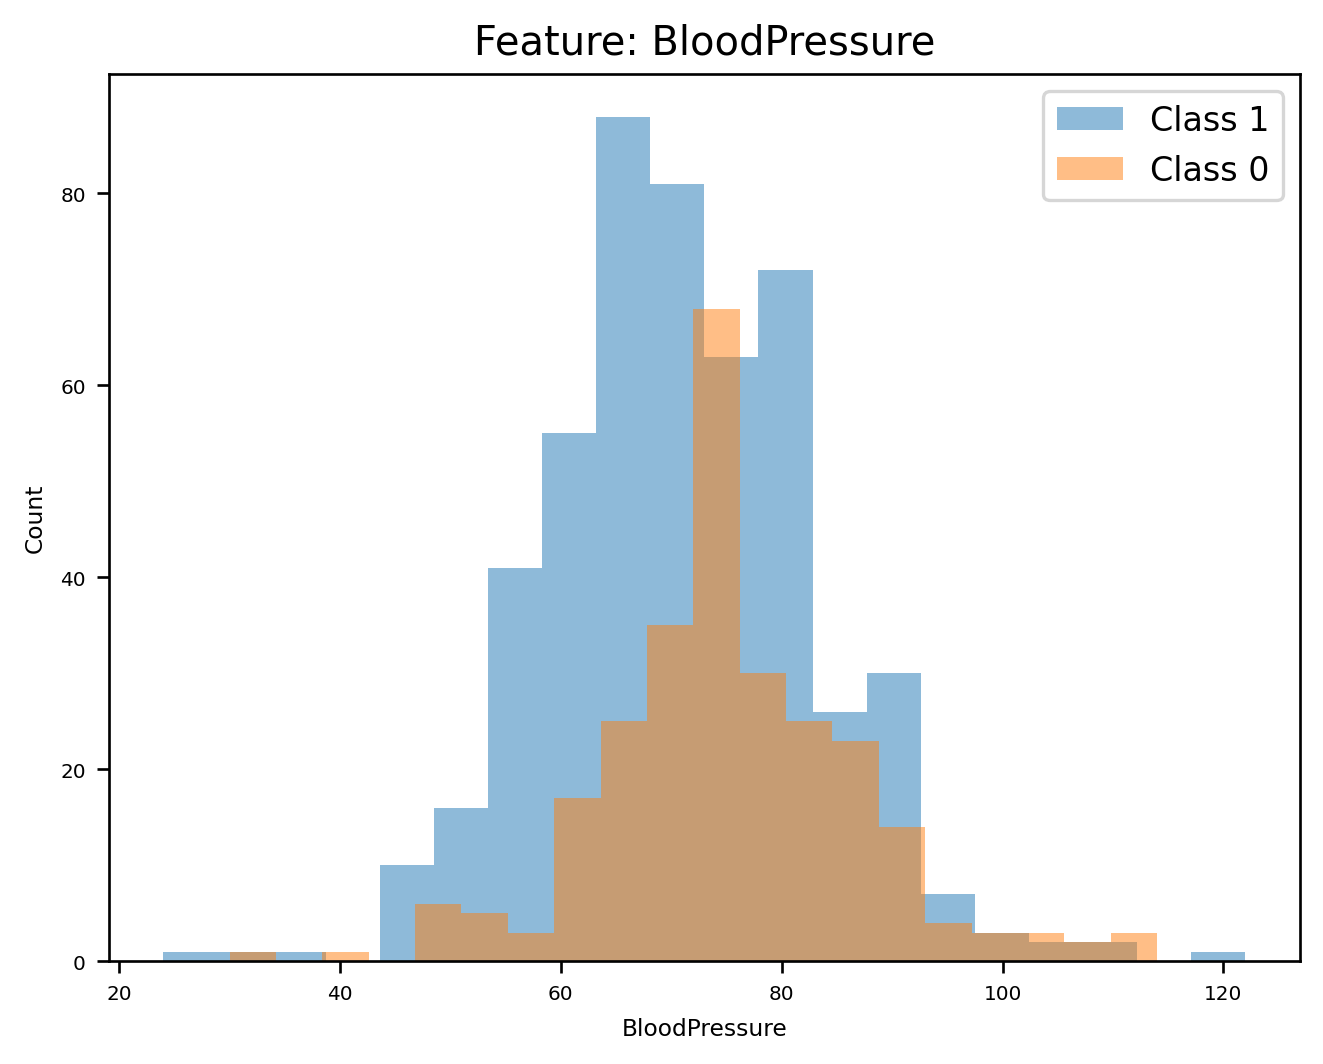

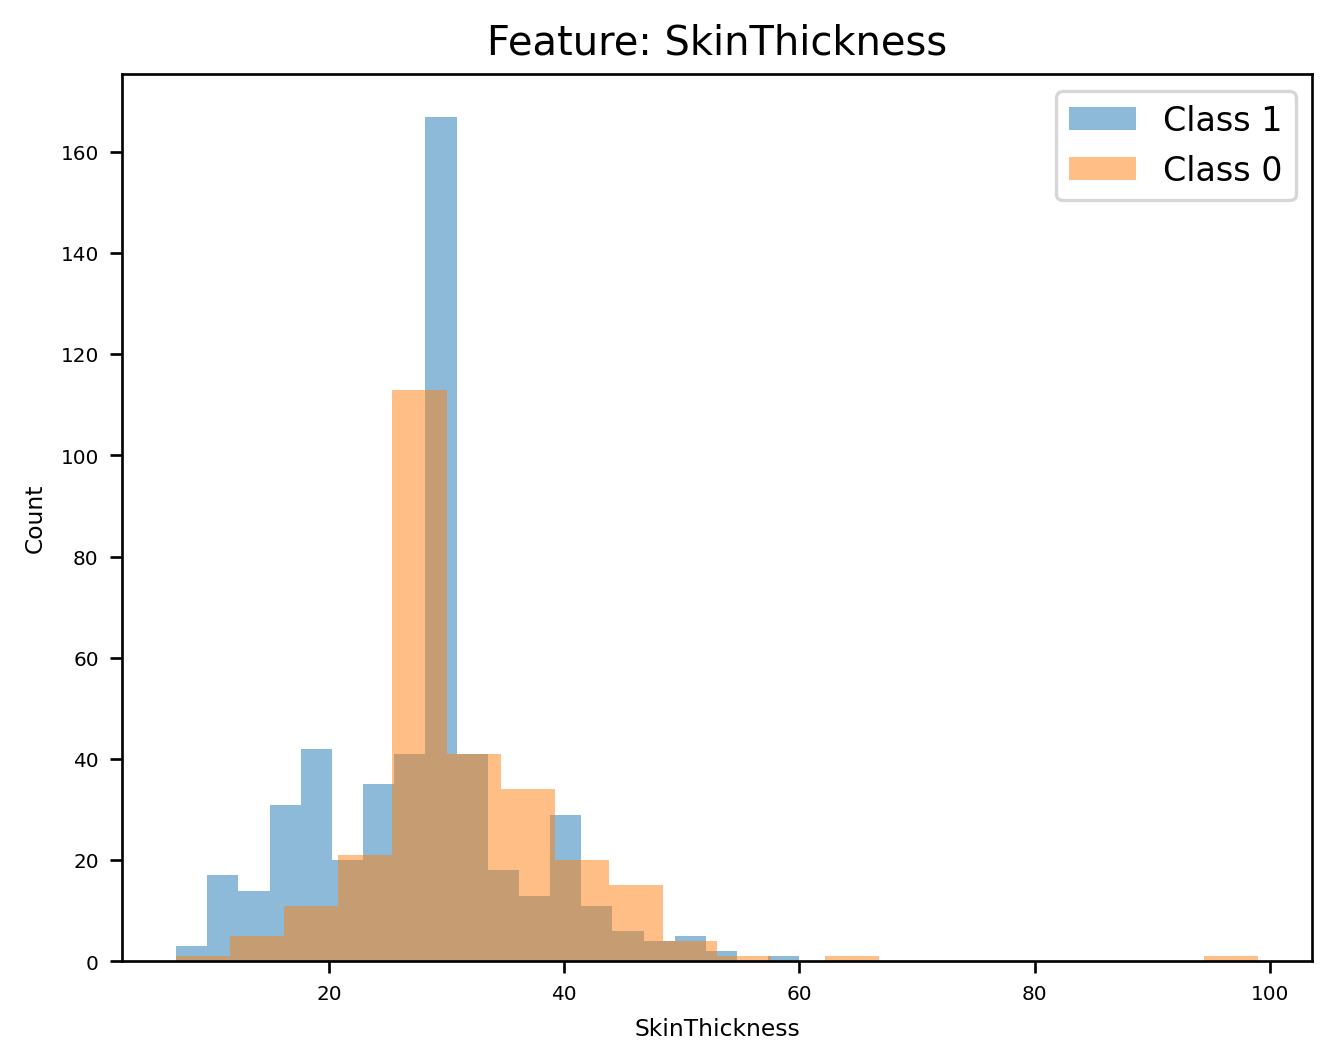

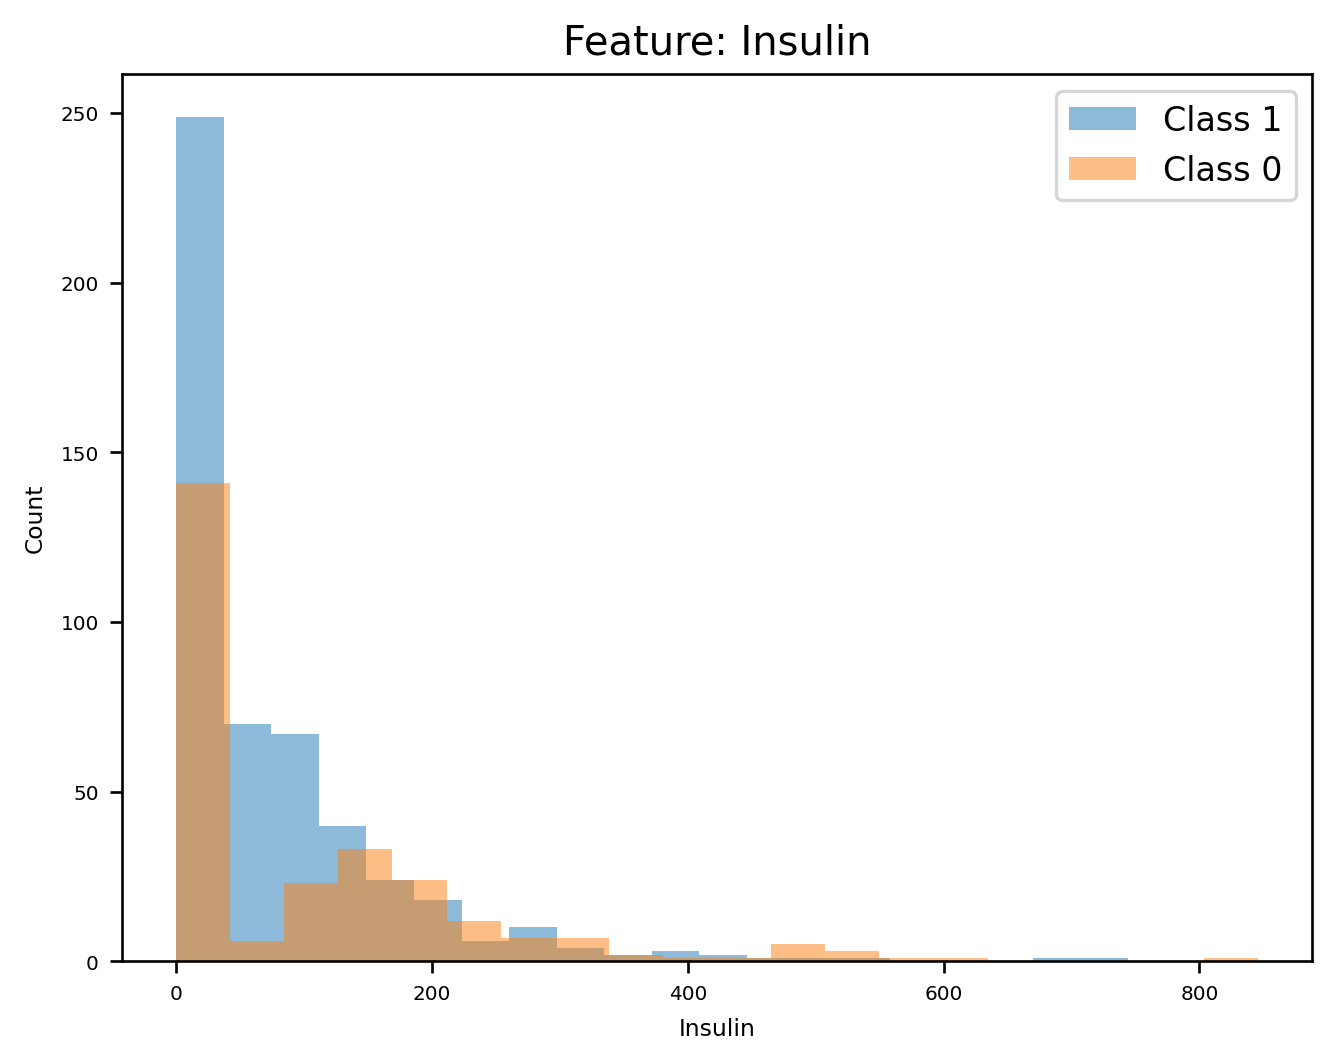

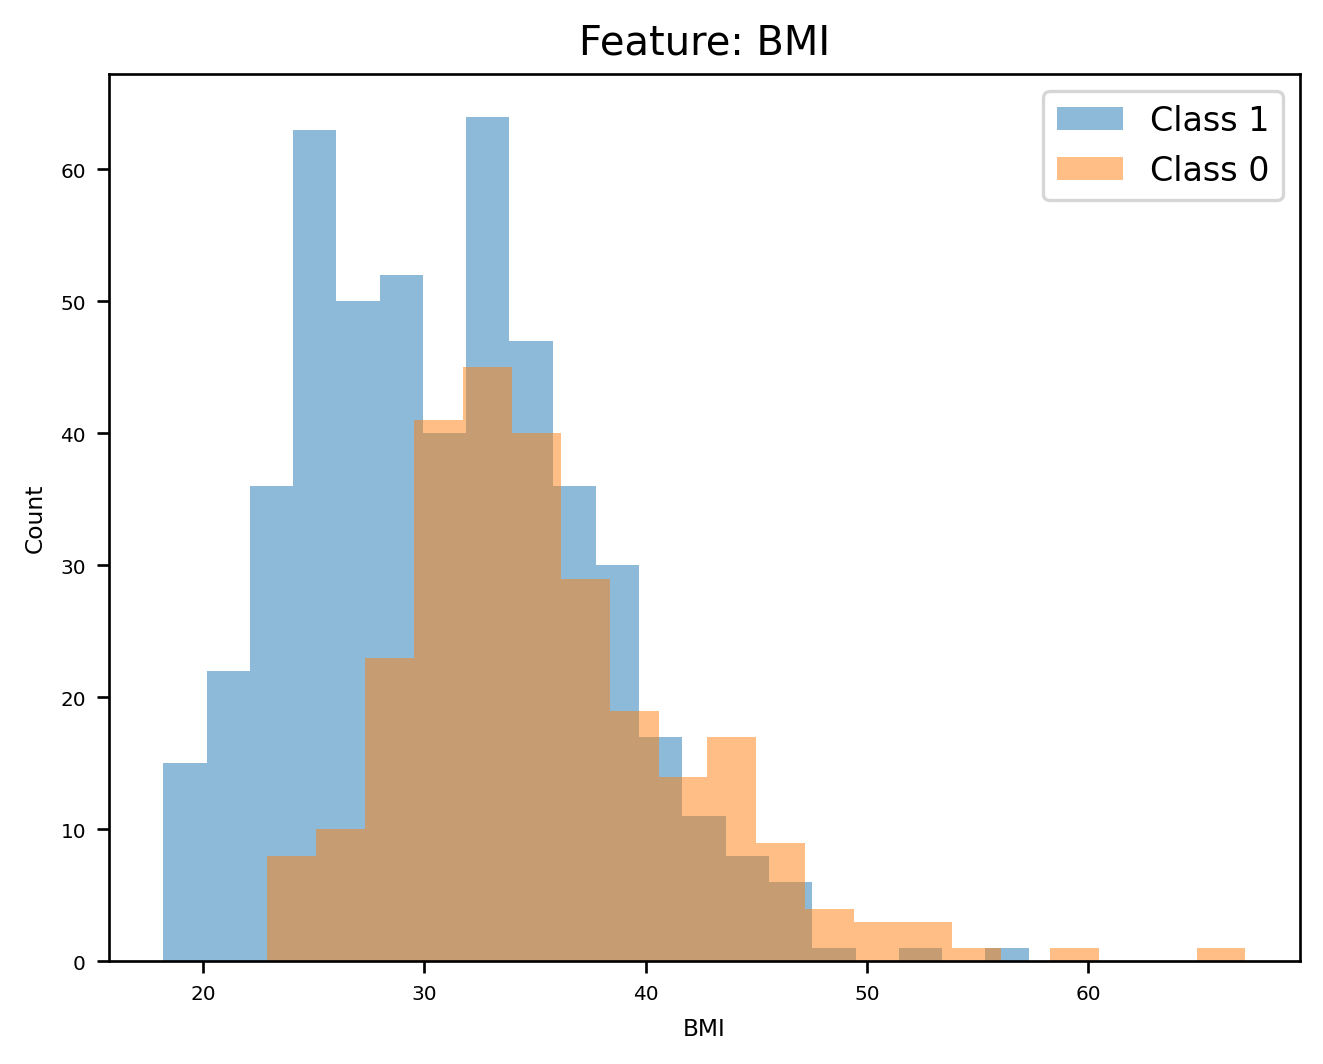

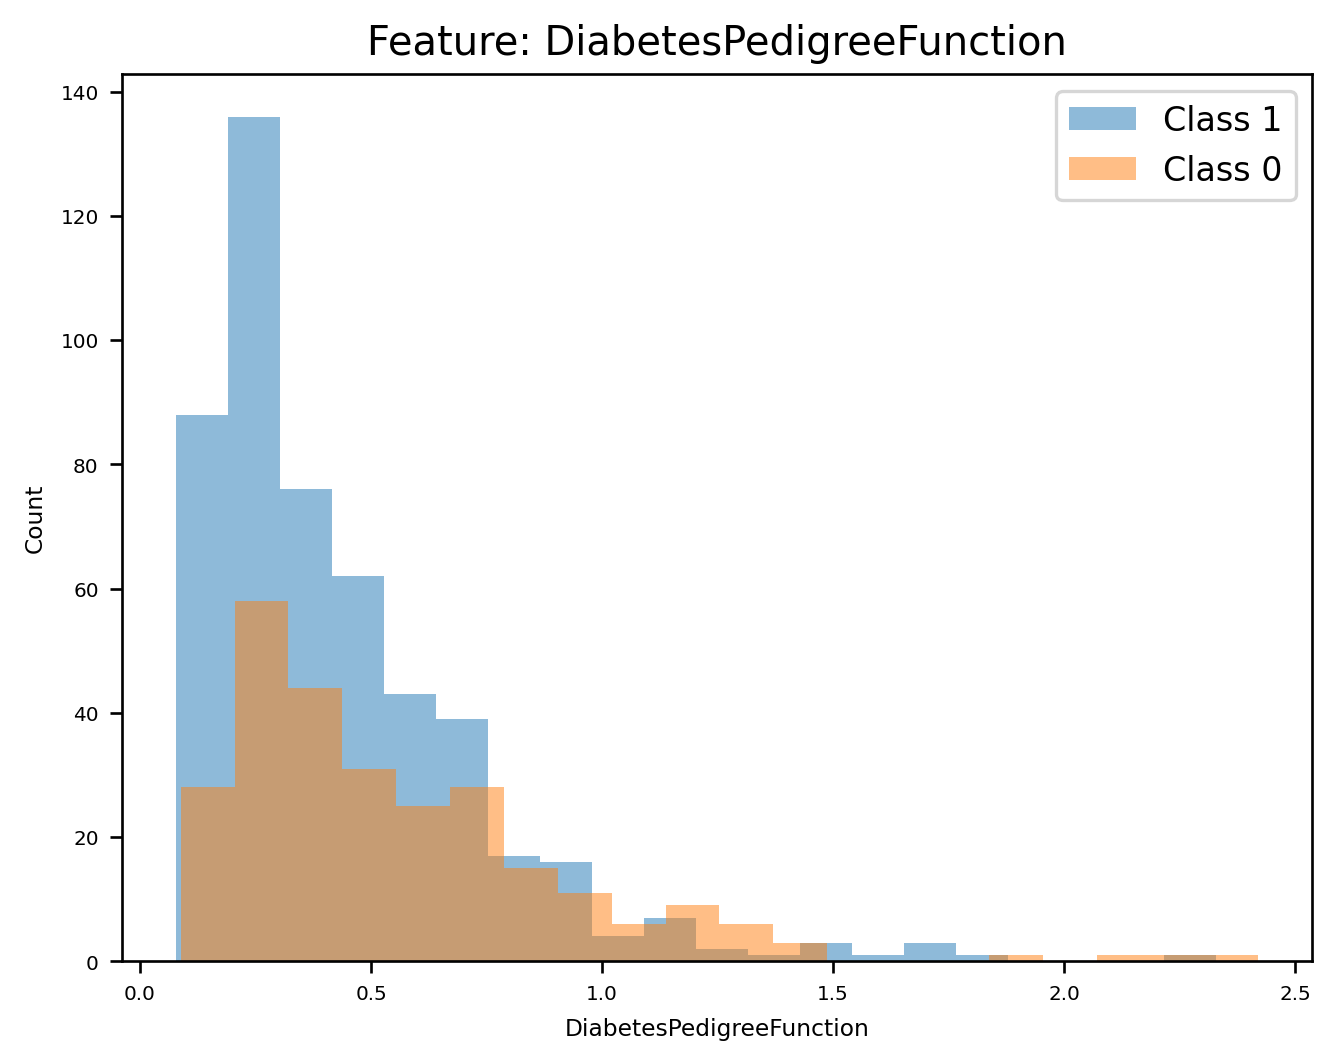

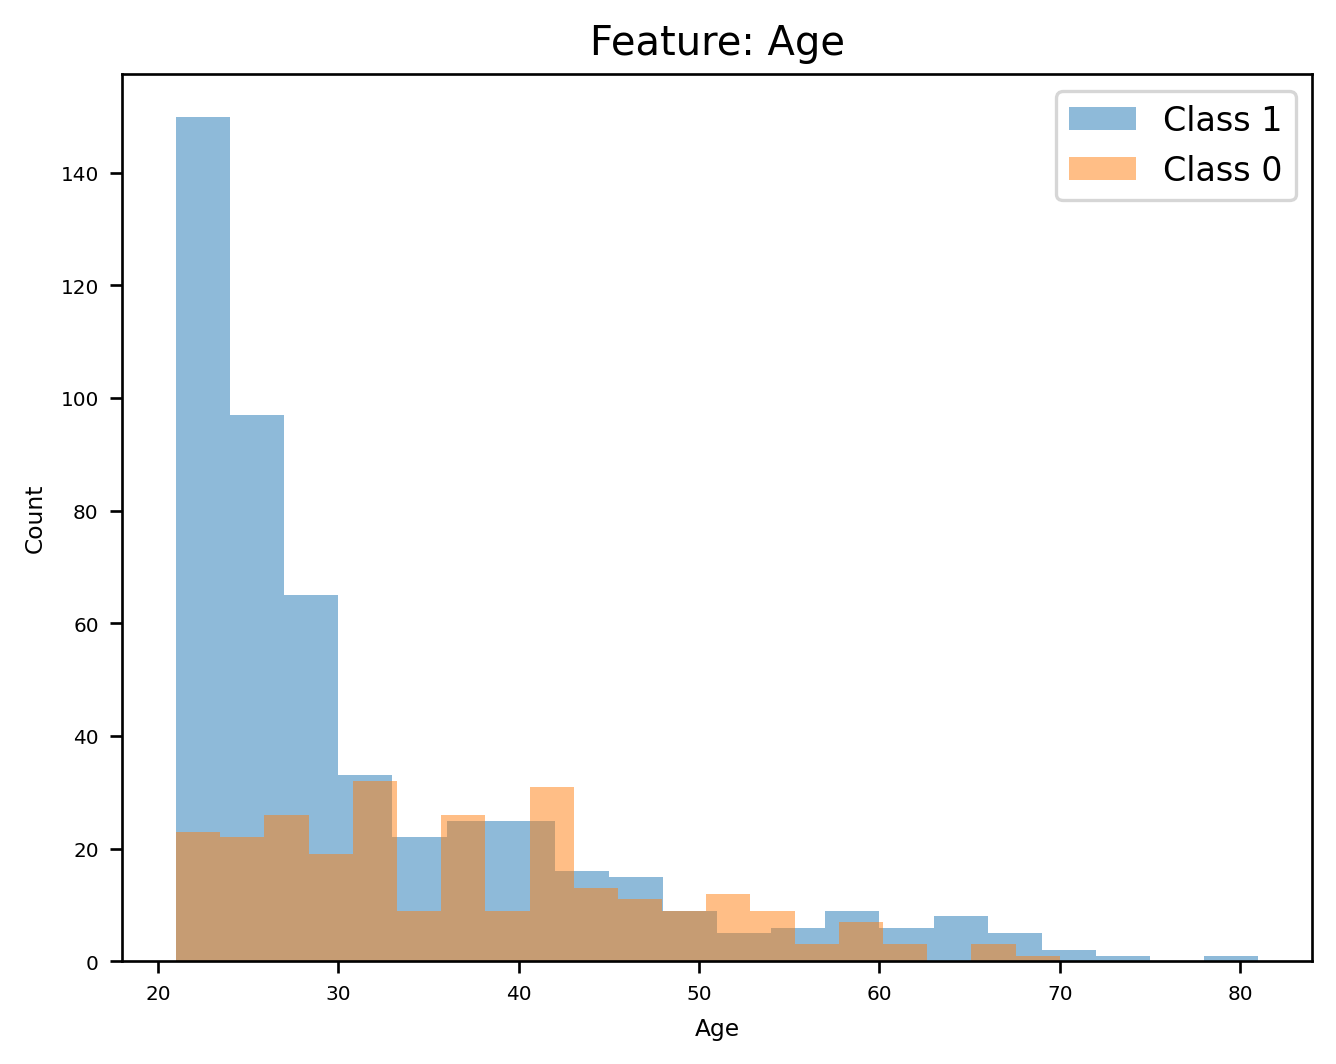

In [168]:
#Graphical dispay of features
label_names = [1,0]
for feat in df.columns:
    plt.title(f"Feature: {feat}")
    #plt.hist(cancer_df[feat])
    for cls in label_names:
        #plt.plot(cancer_df[cancer_df['label'] == cls][feat], '-o',label=f'Class {cls}')
        plt.hist(df[df['label'] == cls][feat], bins=20, alpha=0.5, label=f'Class {cls}')
    plt.legend()
    plt.xlabel(feat)
    plt.ylabel("Count")
    plt.show()

The following code foundation is generated by chatgpt on basis of previous research to make a specific prompt. The initial AI generated code is drastically modified to match the data and display correct results.

Prompt:
Give me a pytorch implementation of classification problem using a simple perceptron approach, f-beta score with beta =10 as evaluation metric, and graphically display the results as well as the loss curve. Give the option to easily adapt variables such as optimizer, learning rate and other optimisation options

In [351]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score, confusion_matrix, ConfusionMatrixDisplay

# Prepare features and labels
X = df.drop('label', axis=1).values
y = df['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train)
# Create a PyTorch dataset
class DiabetesDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = DiabetesDataset(X_train, y_train)
test_dataset = DiabetesDataset(X_test, y_test)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
#train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Baseline Perceptron

Epoch [10/100], Loss: 0.4854, F-beta: 0.7515
Epoch [20/100], Loss: 0.4662, F-beta: 0.7934
Epoch [30/100], Loss: 0.4618, F-beta: 0.8009
Epoch [40/100], Loss: 0.4619, F-beta: 0.8008
Epoch [50/100], Loss: 0.4604, F-beta: 0.8058
Epoch [60/100], Loss: 0.4597, F-beta: 0.8058
Epoch [70/100], Loss: 0.4606, F-beta: 0.8058
Epoch [80/100], Loss: 0.4610, F-beta: 0.8082
Epoch [90/100], Loss: 0.4612, F-beta: 0.8082
Epoch [100/100], Loss: 0.4596, F-beta: 0.8082
Test F-beta Score: 0.7180


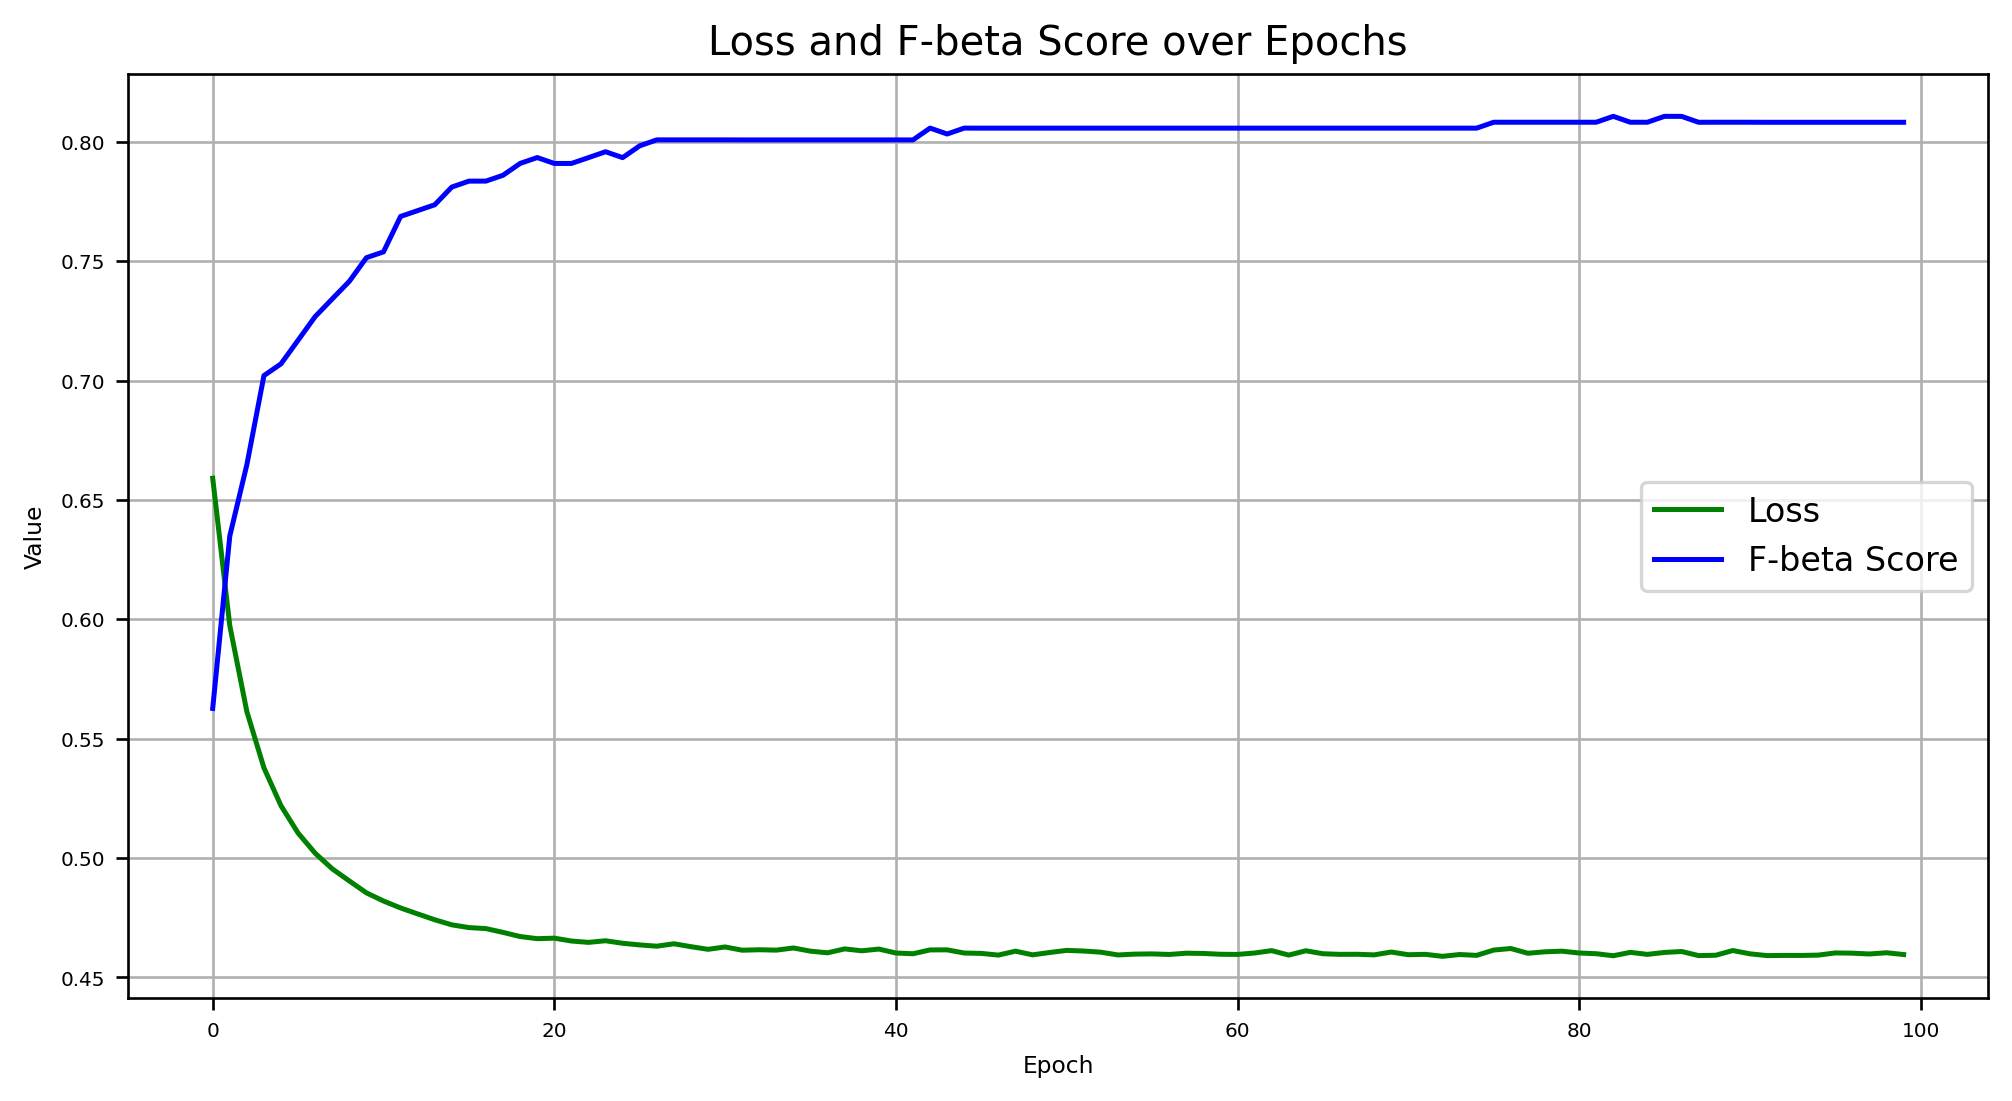

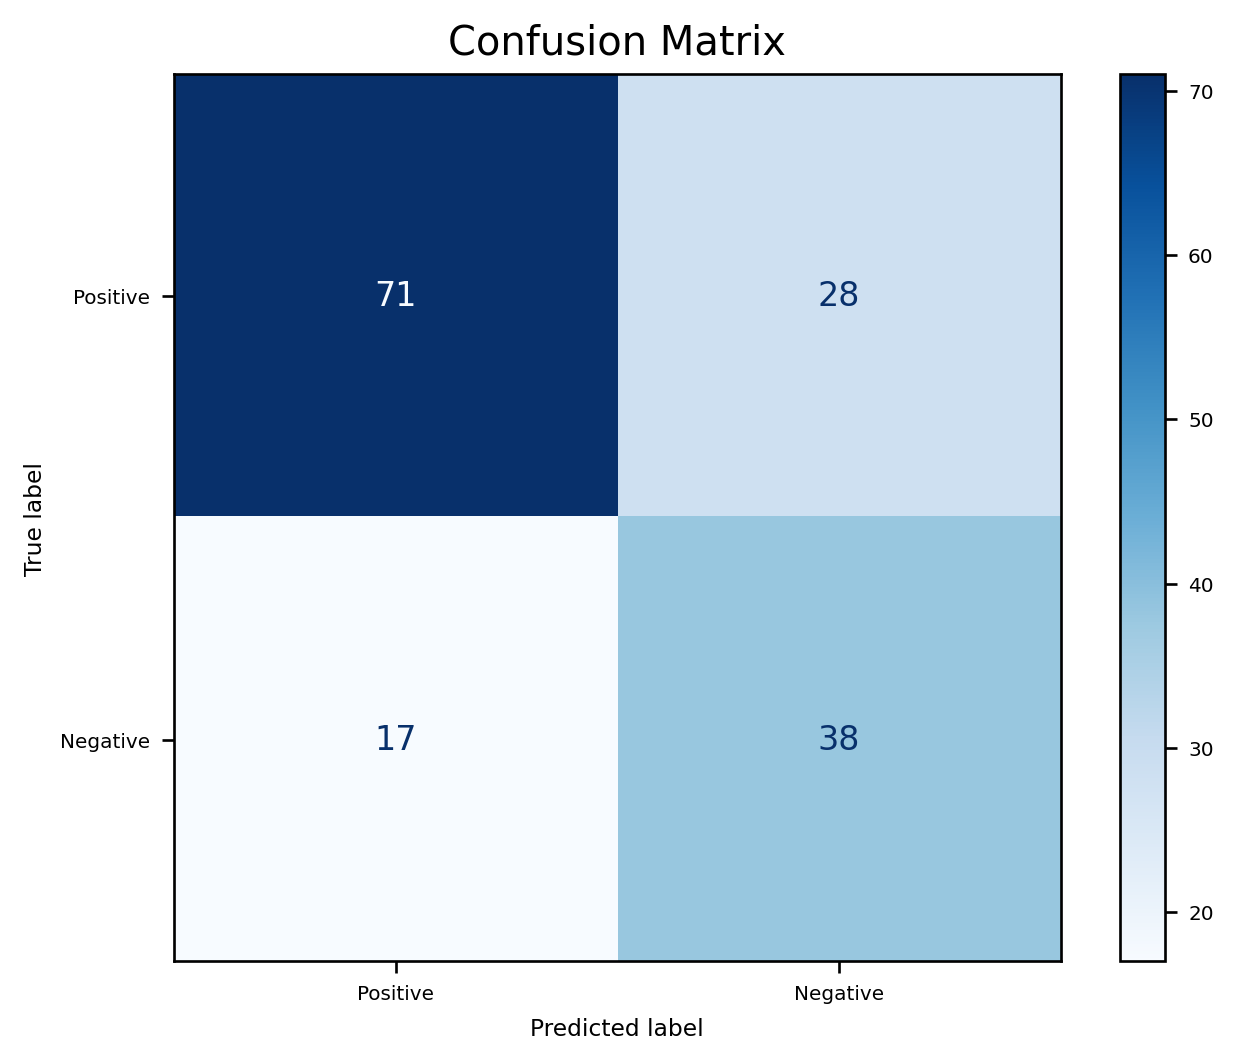

In [326]:
class LinearSingleLayerPerceptron(nn.Module):
    def __init__(self,input_size):
        super(LinearSingleLayerPerceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)  # Linear activation


# Hyperparameters
input_size = X_train.shape[1]
learning_rate = 0.01  # You can change this
num_epochs = 100  # You can change this
optimizer_type = 'SGD'  # Change to 'Adam' or other optimizers

# Instantiate the model, loss function, and optimizer
model = LinearSingleLayerPerceptron(input_size)
criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy Loss with logits
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training the model
losses = []  # To store loss values for plotting
f_beta_list = []
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    
    for batch_X, batch_Y in train_loader:
        # Reshape batch_Y to ensure it has shape (batch_size, 1)
        batch_Y = batch_Y.view(-1, 1)  # Reshape to (batch_size, 1)
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)  # Both should be of shape (batch_size, 1)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    # Average loss for the epoch
    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)
    
    # Evaluate on training data for F-beta score
    with torch.no_grad():
        train_outputs = model(train_dataset.features).squeeze()
        predicted = (train_outputs >= 0.5).float()
        f_beta = fbeta_score(y_train, predicted.numpy(), beta=10)
        f_beta_list.append(f_beta)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, F-beta: {f_beta:.4f}')



# Evaluation on test data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(test_dataset.features).squeeze()
    predicted = (test_outputs >= 0.5).float()
    f_beta_test = fbeta_score(y_test, predicted.numpy(), beta=10)
    print(f'Test F-beta Score: {f_beta_test:.4f}')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predicted.numpy(), labels=[1,0])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive","Negative"])

plt.figure(figsize=(10, 5))
plt.plot(losses, 'g-', label='Loss')
plt.plot(f_beta_list, 'b-', label='F-beta Score')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Loss and F-beta Score over Epochs')
plt.legend()
plt.grid()
plt.show()

# Display the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Remove linearity

Epoch [10/1000], Loss: 0.6226, F-beta: 0.6670
Epoch [20/1000], Loss: 0.6004, F-beta: 0.6670
Epoch [30/1000], Loss: 0.5916, F-beta: 0.6694
Epoch [40/1000], Loss: 0.6202, F-beta: 0.6694
Epoch [50/1000], Loss: 0.5750, F-beta: 0.6694
Epoch [60/1000], Loss: 0.5855, F-beta: 0.6694
Epoch [70/1000], Loss: 0.5770, F-beta: 0.6719
Epoch [80/1000], Loss: 0.6179, F-beta: 0.6719
Epoch [90/1000], Loss: 0.5334, F-beta: 0.6744
Epoch [100/1000], Loss: 0.5518, F-beta: 0.6744
Epoch [110/1000], Loss: 0.5299, F-beta: 0.6744
Epoch [120/1000], Loss: 0.5905, F-beta: 0.6744
Epoch [130/1000], Loss: 0.6338, F-beta: 0.6744
Epoch [140/1000], Loss: 0.5769, F-beta: 0.6768
Epoch [150/1000], Loss: 0.5897, F-beta: 0.6793
Epoch [160/1000], Loss: 0.6107, F-beta: 0.6793
Epoch [170/1000], Loss: 0.5418, F-beta: 0.6843
Epoch [180/1000], Loss: 0.5399, F-beta: 0.6843
Epoch [190/1000], Loss: 0.6156, F-beta: 0.6843
Epoch [200/1000], Loss: 0.5759, F-beta: 0.6868
Epoch [210/1000], Loss: 0.5450, F-beta: 0.6868
Epoch [220/1000], Loss

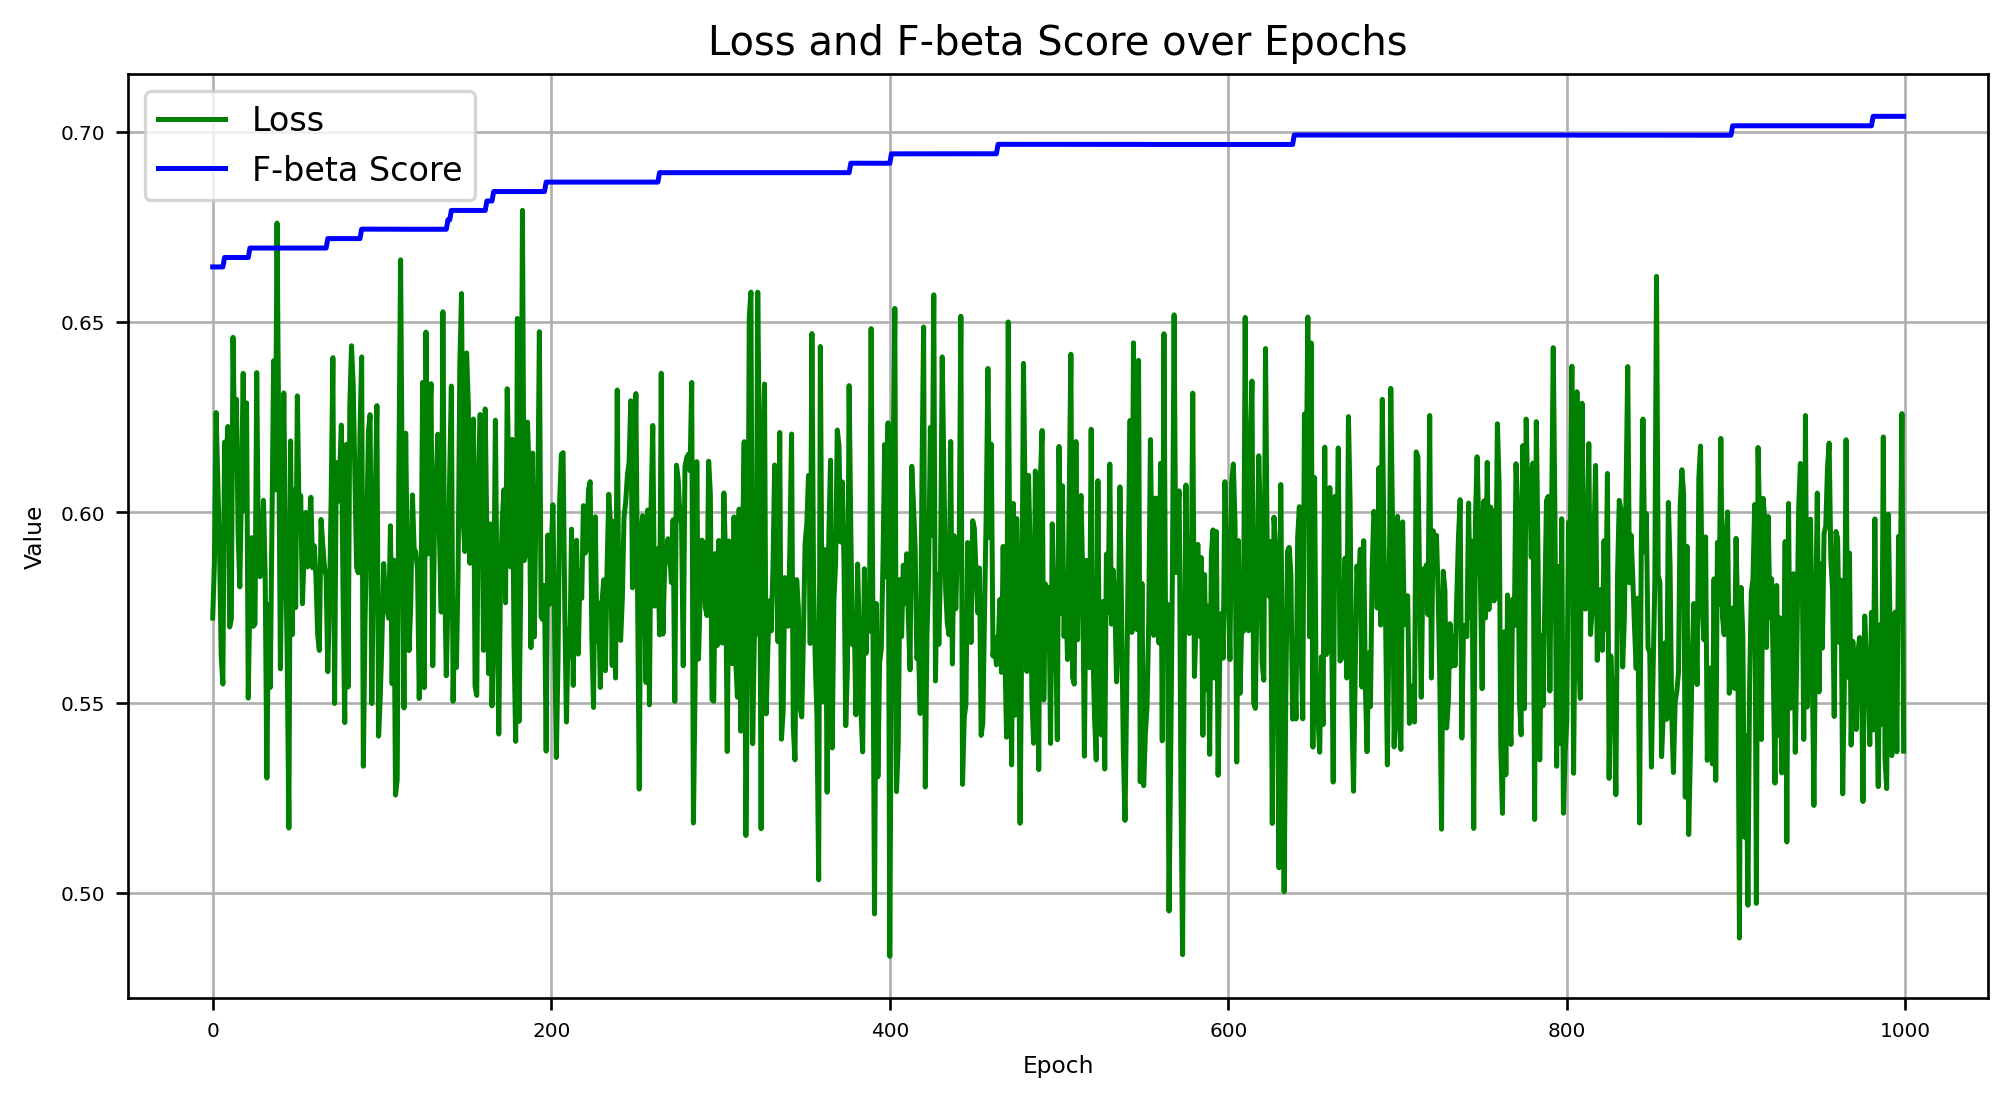

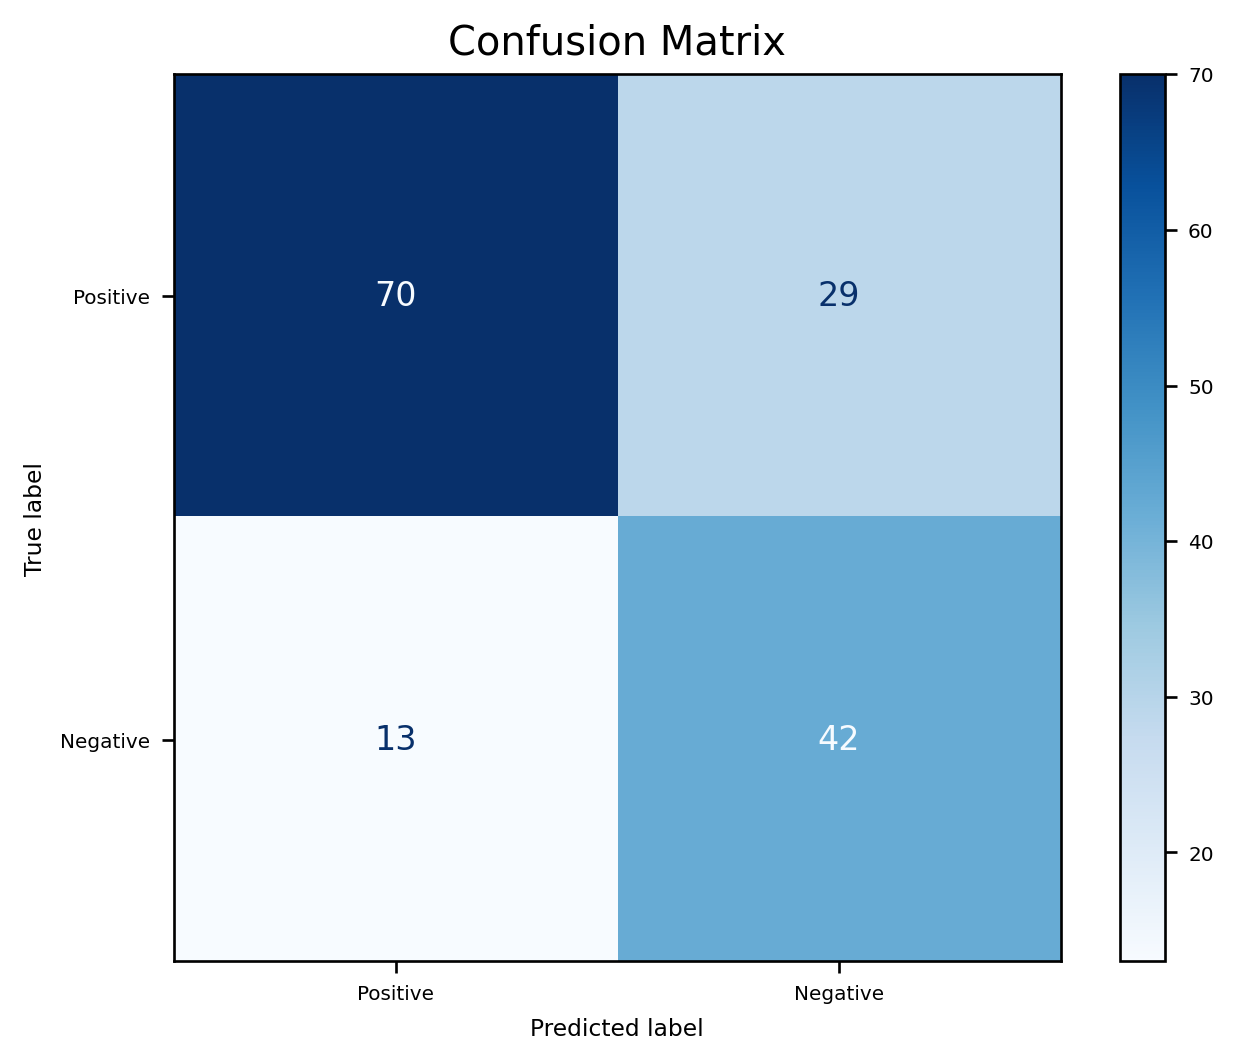

fc.weight: [[-0.09495795 -0.39087123 -0.3183329  -0.2588641  -0.01723005 -0.35646352
   0.07879189  0.02862623]]
fc.bias: [0.14984904]


In [359]:
# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)  # Single output for binary classification

    def forward(self, x):
        return torch.sigmoid(self.fc(x))
    
# Hyperparameters
input_size = X_train.shape[1]
learning_rate = 0.0001  # You can change this
num_epochs = 1000  # You can change this
optimizer_type = 'SGD'  # Change to 'Adam' or other optimizers

# Instantiate the model, loss function, and optimizer
model = Perceptron(input_size)
criterion = nn.BCELoss()

if optimizer_type == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
elif optimizer_type == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
else:
    raise ValueError("Unsupported optimizer type")

# Lists to store loss and f-beta score
loss_list = []
f_beta_list = []

# Training the model
for epoch in range(num_epochs):
    for features, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(features).squeeze()  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    loss_list.append(loss.item())
    
    # Evaluate on training data for F-beta score
    with torch.no_grad():
        train_outputs = model(train_dataset.features).squeeze()
        predicted = (train_outputs >= 0.5).float()
        f_beta = fbeta_score(y_train, predicted.numpy(), beta=10)
        f_beta_list.append(f_beta)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, F-beta: {f_beta:.4f}')

# Evaluation on test data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(test_dataset.features).squeeze()
    predicted = (test_outputs >= 0.5).float()
    f_beta_test = fbeta_score(y_test, predicted.numpy(), beta=10)
    print(f'Test F-beta Score: {f_beta_test:.4f}')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predicted.numpy(), labels=[1,0])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive","Negative"])

plt.figure(figsize=(10, 5))
plt.plot(loss_list, 'g-', label='Loss')
plt.plot(f_beta_list, 'b-', label='F-beta Score')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Loss and F-beta Score over Epochs')
plt.legend()
plt.grid()
plt.show()

# Display the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Accessing the weights after fitting the model
weights = model.state_dict()

# Display the weights
for name, param in weights.items():
    print(f"{name}: {param.data.numpy()}")

# Learning Rate

Epoch [10/1000], Loss: 0.6263, F-beta: 0.8169
Epoch [20/1000], Loss: 0.5974, F-beta: 0.8319
Epoch [30/1000], Loss: 0.5409, F-beta: 0.8370
Epoch [40/1000], Loss: 0.4878, F-beta: 0.8495
Epoch [50/1000], Loss: 0.5222, F-beta: 0.8570
Epoch [60/1000], Loss: 0.5721, F-beta: 0.8545
Epoch [70/1000], Loss: 0.4652, F-beta: 0.8595
Epoch [80/1000], Loss: 0.5290, F-beta: 0.8571
Epoch [90/1000], Loss: 0.4682, F-beta: 0.8596
Epoch [100/1000], Loss: 0.5400, F-beta: 0.8621
Epoch [110/1000], Loss: 0.4704, F-beta: 0.8596
Epoch [120/1000], Loss: 0.5133, F-beta: 0.8621
Epoch [130/1000], Loss: 0.4514, F-beta: 0.8621
Epoch [140/1000], Loss: 0.4945, F-beta: 0.8621
Epoch [150/1000], Loss: 0.4800, F-beta: 0.8621
Epoch [160/1000], Loss: 0.4347, F-beta: 0.8646
Epoch [170/1000], Loss: 0.5223, F-beta: 0.8695
Epoch [180/1000], Loss: 0.4442, F-beta: 0.8670
Epoch [190/1000], Loss: 0.4212, F-beta: 0.8695
Epoch [200/1000], Loss: 0.4752, F-beta: 0.8670
Epoch [210/1000], Loss: 0.5194, F-beta: 0.8670
Epoch [220/1000], Loss

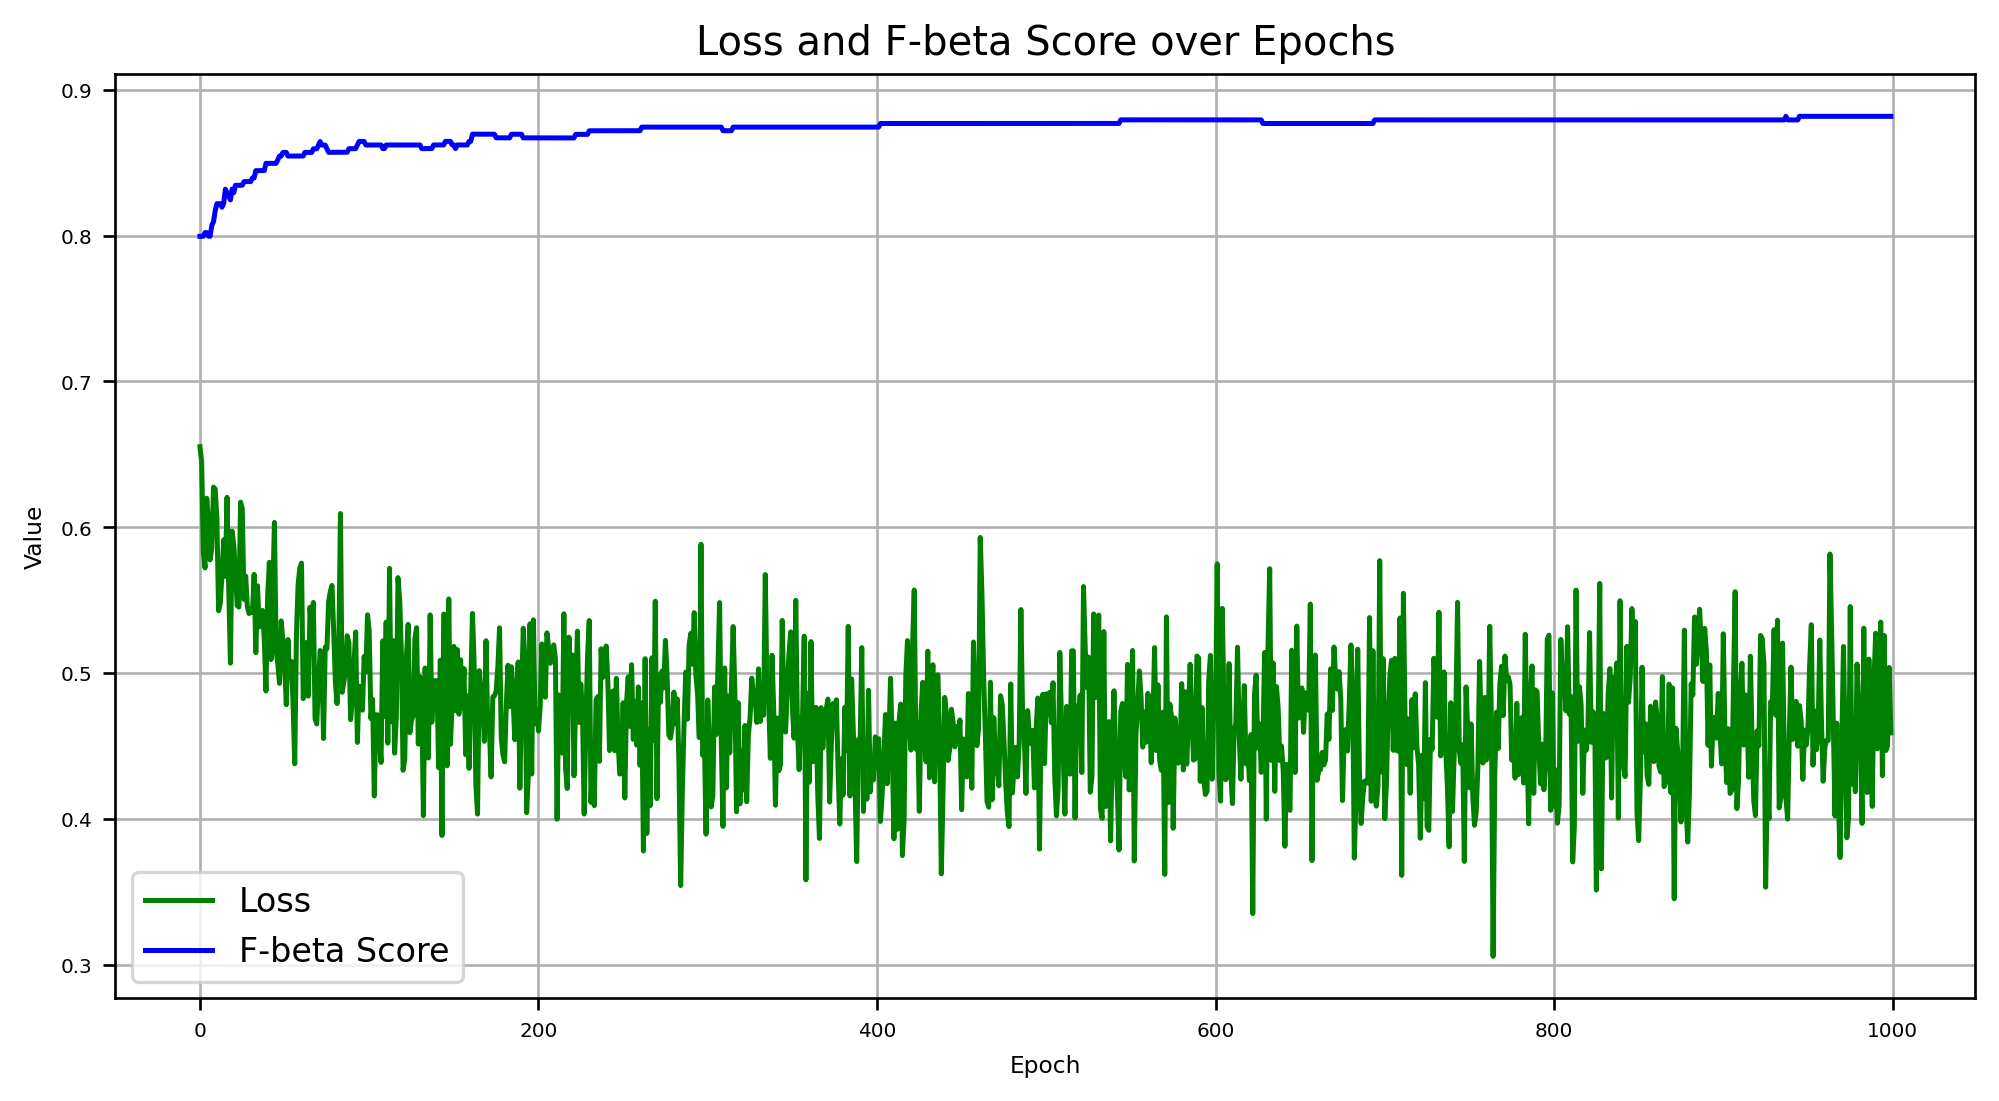

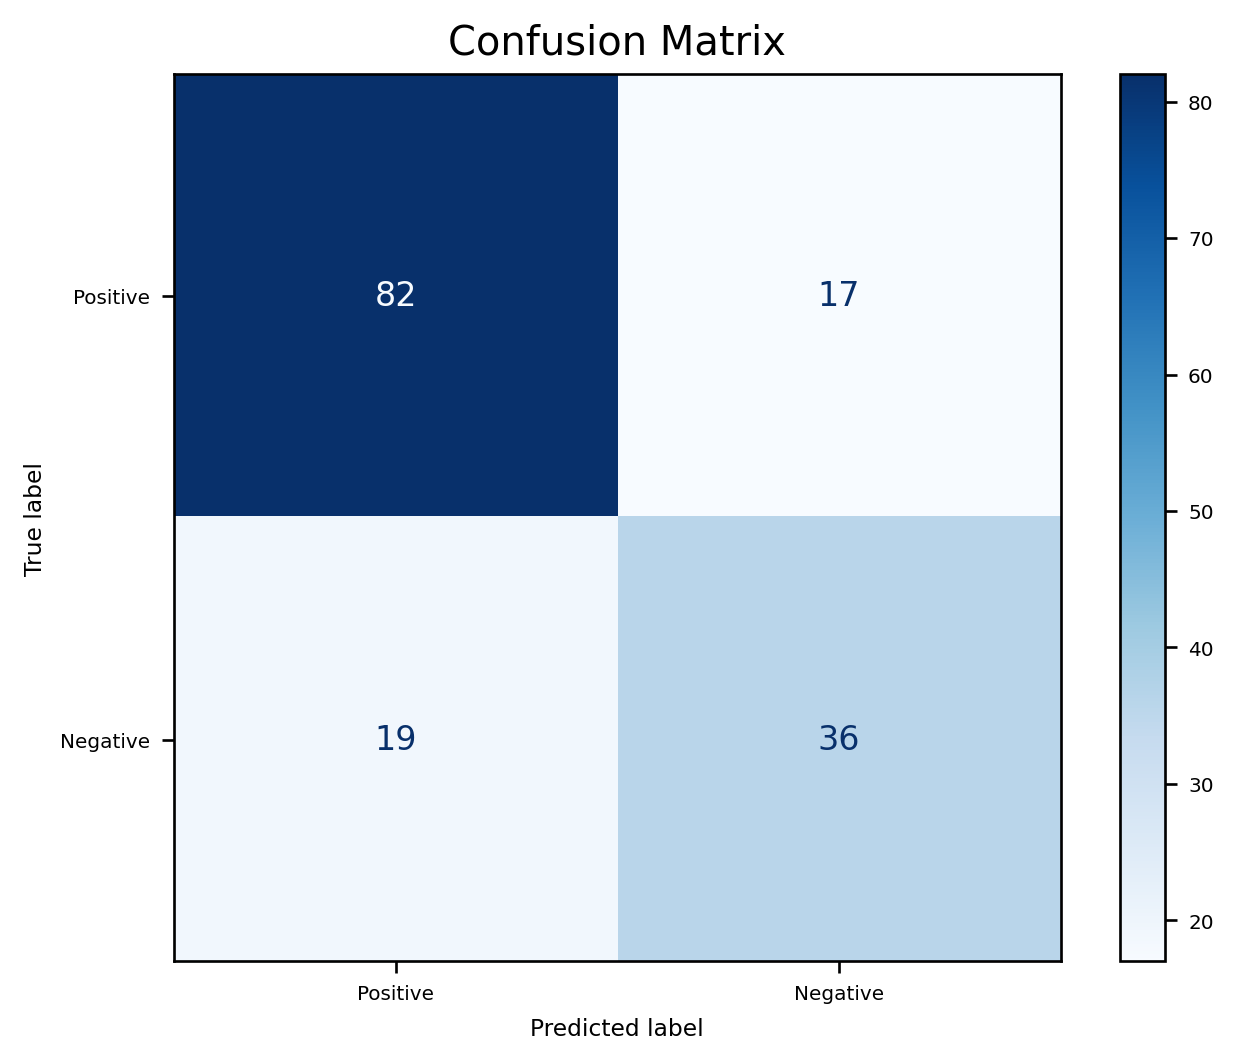

fc.weight: [[-0.21886861 -1.1386131   0.16200314 -0.08523134  0.22745296 -0.6917385
  -0.2203941  -0.36614653]]
fc.bias: [0.8741679]


In [304]:
# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)  # Single output for binary classification

    def forward(self, x):
        return torch.sigmoid(self.fc(x))
    
# Hyperparameters
input_size = X_train.shape[1]
learning_rate = 0.01  # You can change this
num_epochs = 1000  # You can change this
optimizer_type = 'SGD'  # Change to 'Adam' or other optimizers

# Instantiate the model, loss function, and optimizer
model = Perceptron(input_size)
criterion = nn.BCELoss()

if optimizer_type == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
elif optimizer_type == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
else:
    raise ValueError("Unsupported optimizer type")

# Lists to store loss and f-beta score
loss_list = []
f_beta_list = []

# Training the model
for epoch in range(num_epochs):
    for features, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(features).squeeze()  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    loss_list.append(loss.item())
    
    # Evaluate on training data for F-beta score
    with torch.no_grad():
        train_outputs = model(train_dataset.features).squeeze()
        predicted = (train_outputs >= 0.5).float()
        f_beta = fbeta_score(y_train, predicted.numpy(), beta=10)
        f_beta_list.append(f_beta)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, F-beta: {f_beta:.4f}')

# Evaluation on test data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(test_dataset.features).squeeze()
    predicted = (test_outputs >= 0.5).float()
    f_beta_test = fbeta_score(y_test, predicted.numpy(), beta=10)
    print(f'Test F-beta Score: {f_beta_test:.4f}')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predicted.numpy(), labels=[1,0])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive","Negative"])

plt.figure(figsize=(10, 5))
plt.plot(loss_list, 'g-', label='Loss')
plt.plot(f_beta_list, 'b-', label='F-beta Score')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Loss and F-beta Score over Epochs')
plt.legend()
plt.grid()
plt.show()

# Display the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Accessing the weights after fitting the model
weights = model.state_dict()

# Display the weights
for name, param in weights.items():
    print(f"{name}: {param.data.numpy()}")

# Multilayer Perceptron

Epoch [10/1000], Loss: 0.6896, F-beta: 0.4778
Epoch [20/1000], Loss: 0.6858, F-beta: 0.6268
Epoch [30/1000], Loss: 0.6806, F-beta: 0.7184
Epoch [40/1000], Loss: 0.6780, F-beta: 0.7947
Epoch [50/1000], Loss: 0.6724, F-beta: 0.8710
Epoch [60/1000], Loss: 0.6711, F-beta: 0.8979
Epoch [70/1000], Loss: 0.6677, F-beta: 0.9150
Epoch [80/1000], Loss: 0.6639, F-beta: 0.9322
Epoch [90/1000], Loss: 0.6597, F-beta: 0.9469
Epoch [100/1000], Loss: 0.6603, F-beta: 0.9591
Epoch [110/1000], Loss: 0.6557, F-beta: 0.9590
Epoch [120/1000], Loss: 0.6521, F-beta: 0.9614
Epoch [130/1000], Loss: 0.6466, F-beta: 0.9663
Epoch [140/1000], Loss: 0.6543, F-beta: 0.9687
Epoch [150/1000], Loss: 0.6244, F-beta: 0.9686
Epoch [160/1000], Loss: 0.6360, F-beta: 0.9661
Epoch [170/1000], Loss: 0.6411, F-beta: 0.9711
Epoch [180/1000], Loss: 0.6353, F-beta: 0.9711
Epoch [190/1000], Loss: 0.6340, F-beta: 0.9711
Epoch [200/1000], Loss: 0.6245, F-beta: 0.9735
Epoch [210/1000], Loss: 0.6220, F-beta: 0.9735
Epoch [220/1000], Loss

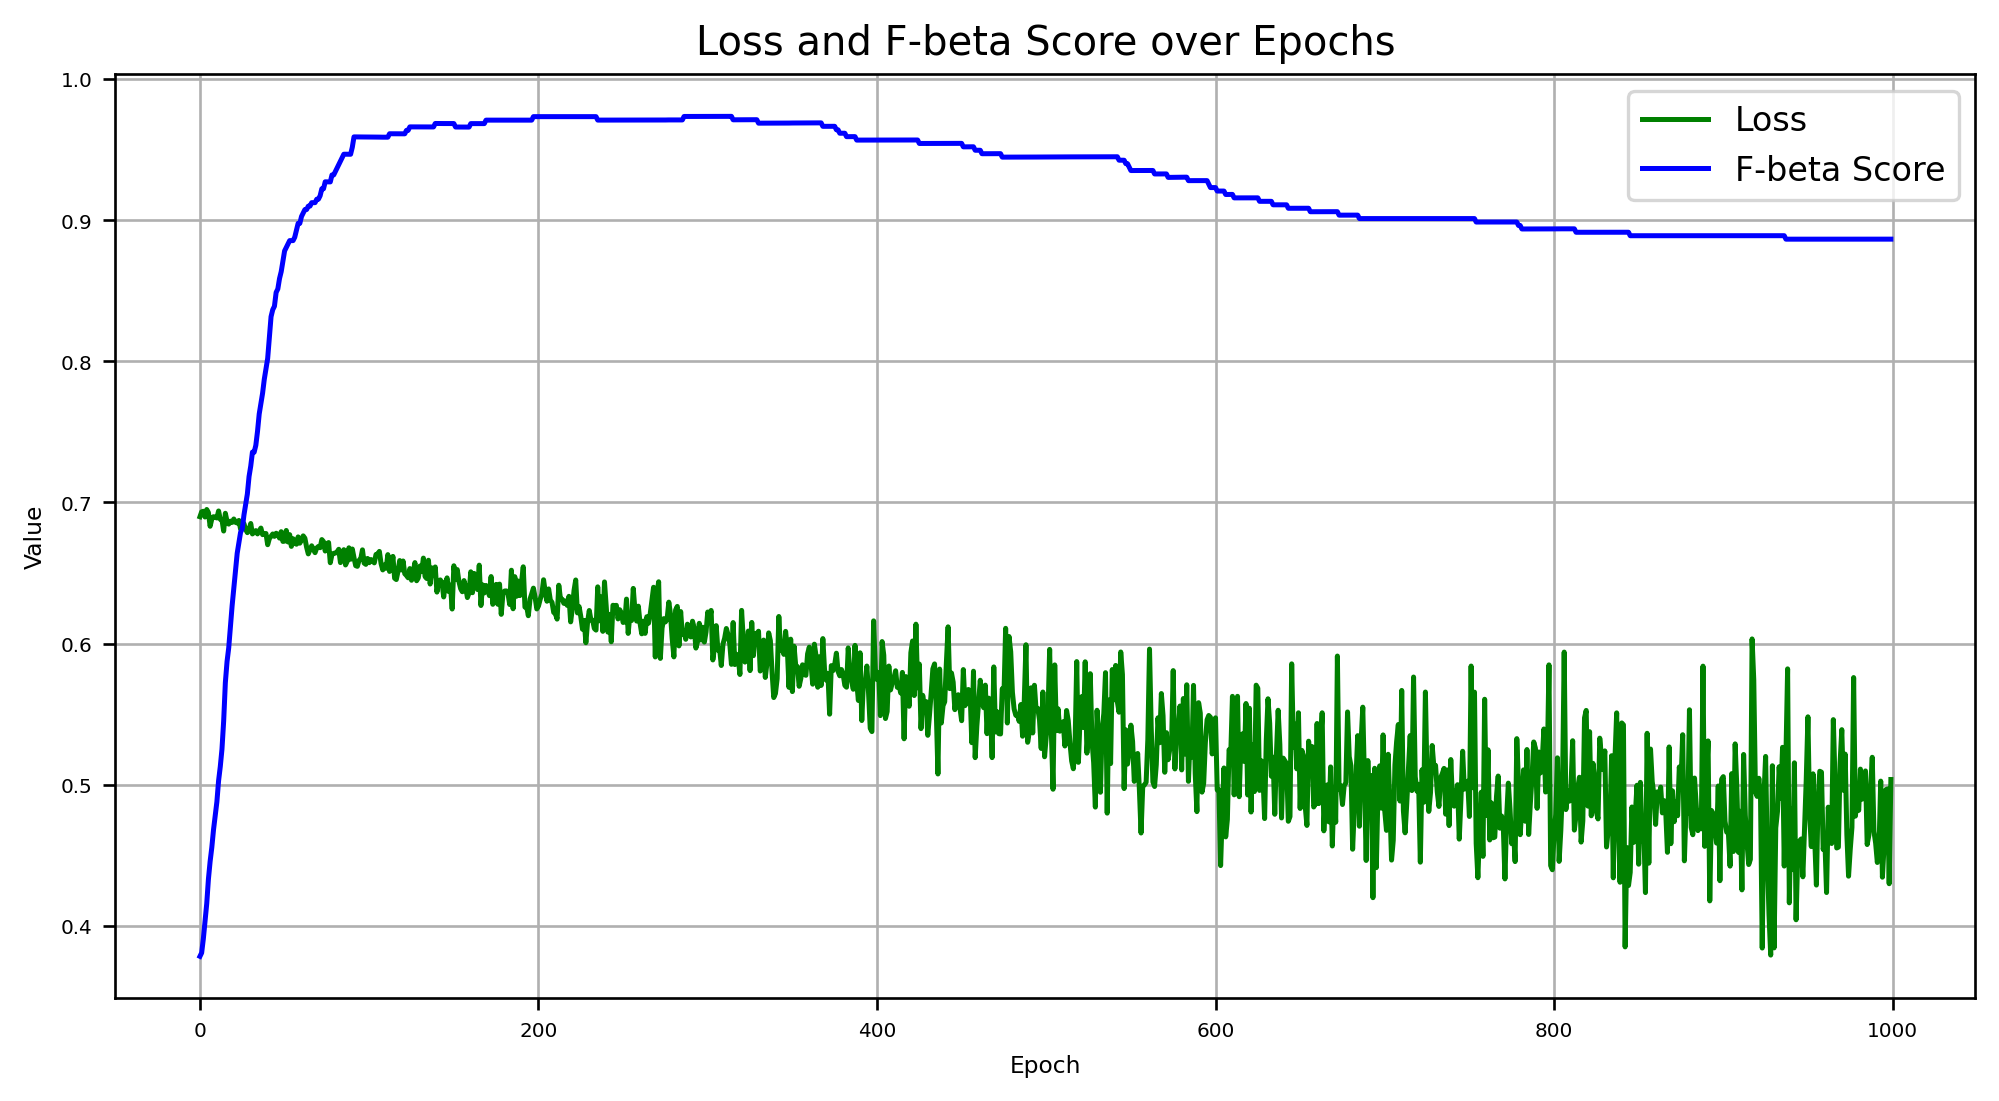

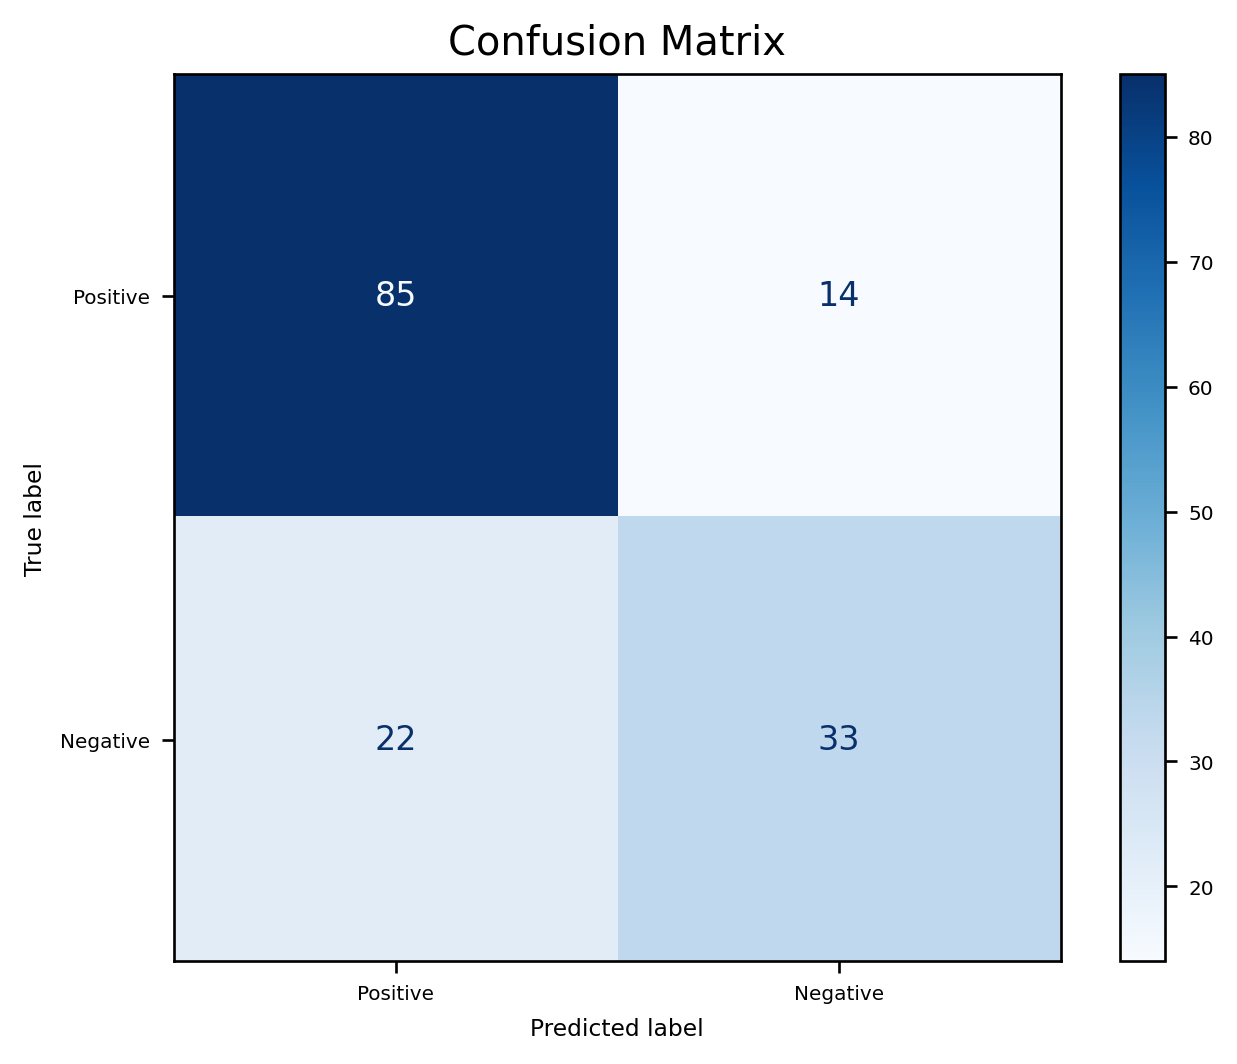

In [370]:
# Define the Multi-Layer Perceptron model
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)  # First hidden layer with 16 neurons
        #self.fc2 = nn.Linear(64, 32)  
        self.fc3 = nn.Linear(32, 16) # Second hidden layer with 8 neurons
        self.fc4 = nn.Linear(16, 8) 
        self.fc5 = nn.Linear(8, 1)             # Output layer
        self.relu = nn.ReLU()                   # Activation function

    def forward(self, x):
        x = self.fc1(x)
        #x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.fc4(x)
        x = torch.sigmoid(self.fc5(x))  # Output layer with sigmoid for binary classification
        return x

# Hyperparameters
input_size = X_train.shape[1]
learning_rate = 0.001  # You can change this
num_epochs = 1000  # You can change this
optimizer_type = 'SGD'  # Change to 'Adam' or other optimizers

# Instantiate the model, loss function, and optimizer
model = MLP(input_size)
criterion = nn.BCELoss()

if optimizer_type == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
elif optimizer_type == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
else:
    raise ValueError("Unsupported optimizer type")

# Lists to store loss and F-beta score
loss_list = []
f_beta_list = []

# Training the model
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for features, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(features).squeeze()  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    loss_list.append(loss.item())
    
    # Calculate F-beta score on the training set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        train_outputs = model(train_dataset.features).squeeze()
        predicted = (train_outputs >= 0.5).float()
        f_beta = fbeta_score(y_train, predicted.numpy(), beta=10)
        f_beta_list.append(f_beta)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, F-beta: {f_beta:.4f}')

# Final evaluation on the test data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(test_dataset.features).squeeze()
    predicted = (test_outputs >= 0.5).float()
    f_beta_test = fbeta_score(y_test, predicted.numpy(), beta=10)
    print(f'Test F-beta Score: {f_beta_test:.4f}')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predicted.numpy(), labels=[1, 0])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])

plt.figure(figsize=(10, 5))
plt.plot(loss_list, 'g-', label='Loss')
plt.plot(f_beta_list, 'b-', label='F-beta Score')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Loss and F-beta Score over Epochs')
plt.legend()
plt.grid()
plt.show()

# Display the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Epoch [10/100], Loss: 0.4698, F-beta: 0.7786
Epoch [20/100], Loss: 0.4624, F-beta: 0.8009
Epoch [30/100], Loss: 0.4611, F-beta: 0.8082
Epoch [40/100], Loss: 0.4630, F-beta: 0.8107
Epoch [50/100], Loss: 0.4641, F-beta: 0.8058
Epoch [60/100], Loss: 0.4612, F-beta: 0.8083
Epoch [70/100], Loss: 0.4619, F-beta: 0.8107
Epoch [80/100], Loss: 0.4620, F-beta: 0.8107
Epoch [90/100], Loss: 0.4611, F-beta: 0.8107
Epoch [100/100], Loss: 0.4610, F-beta: 0.8083
Test F-beta Score: 0.7180


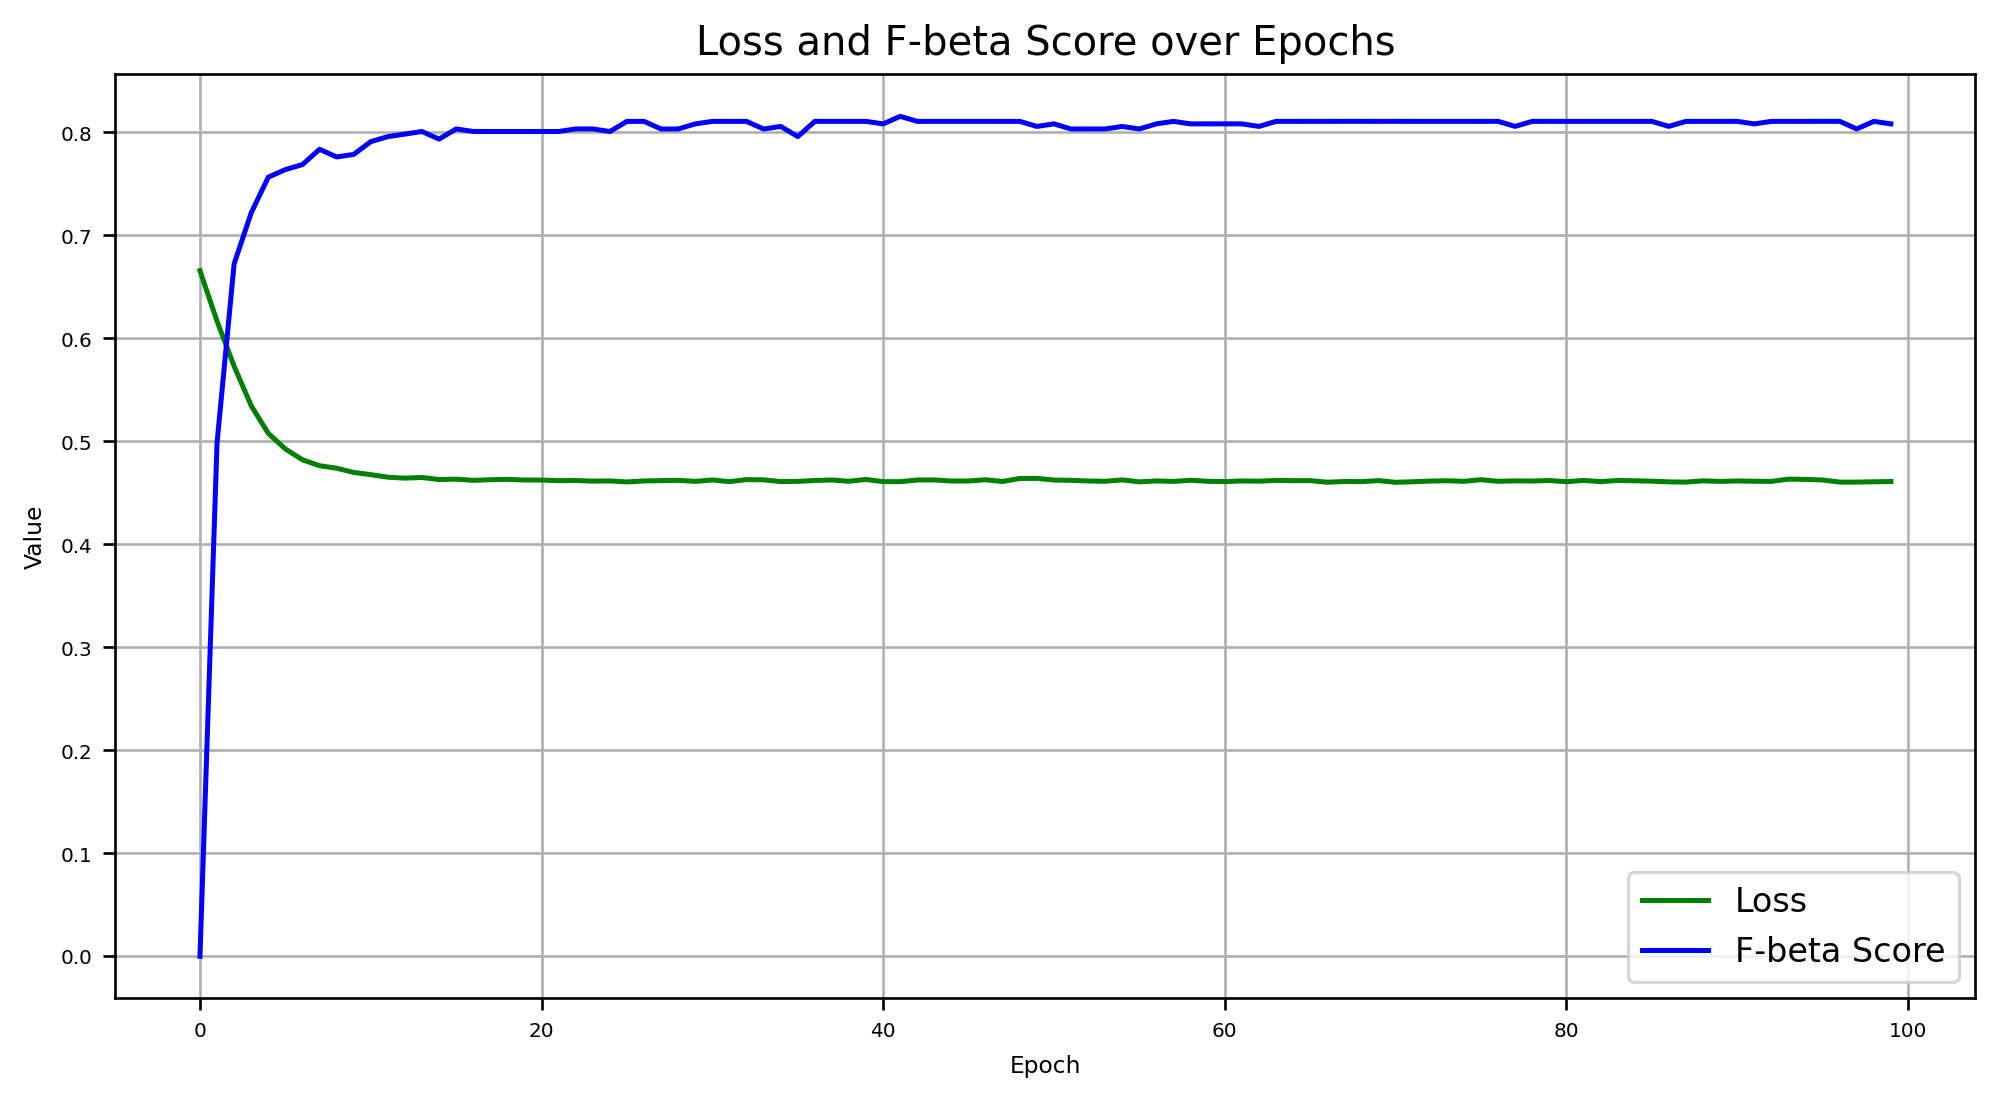

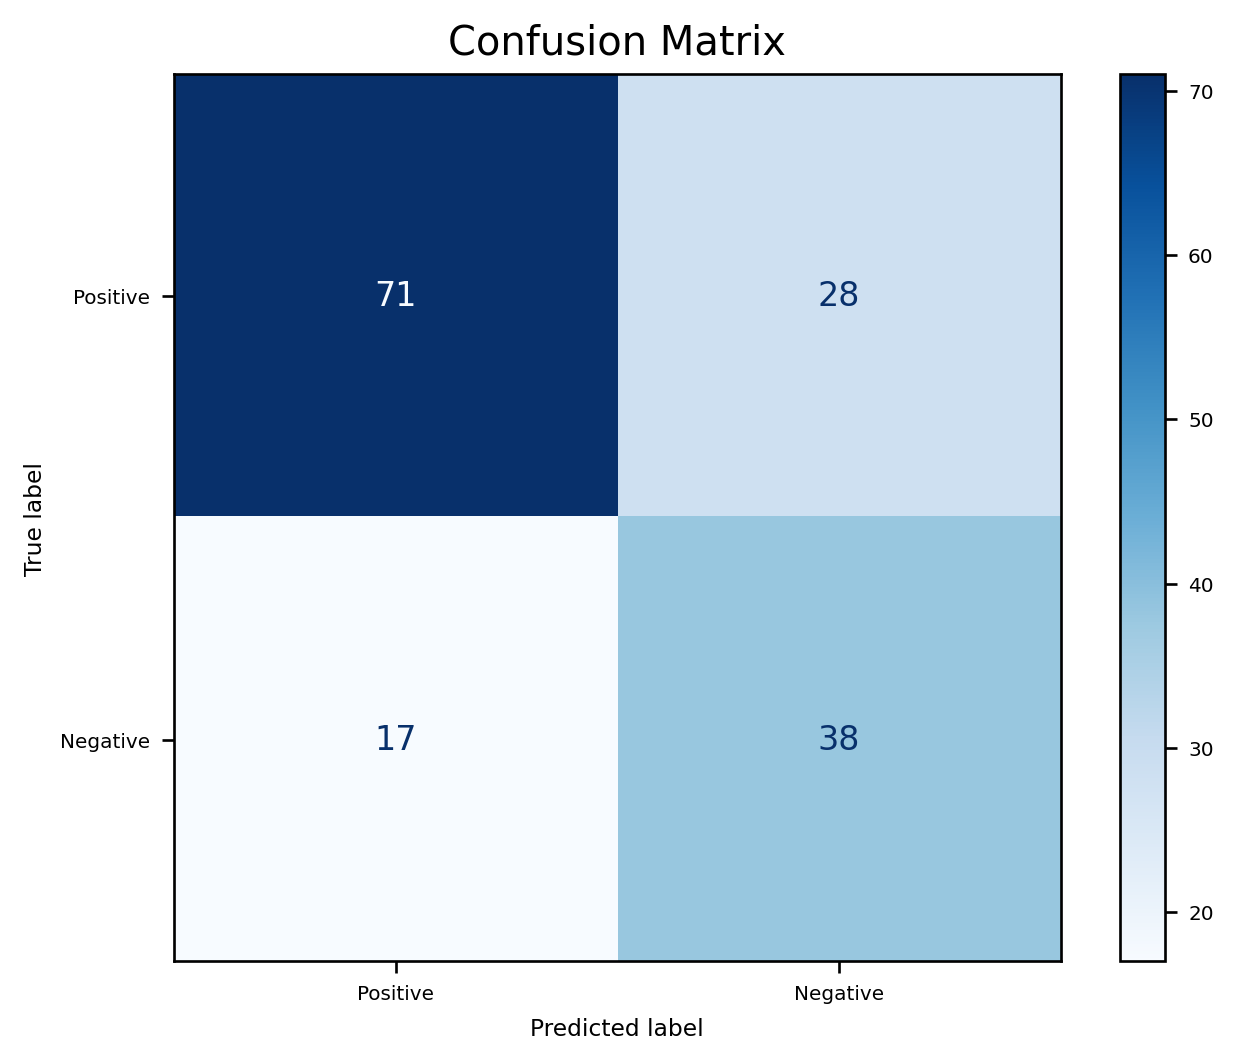

In [324]:
class LinearMultiLayerPerceptron(nn.Module):
    def __init__(self,input_size):
        super(LinearMultiLayerPerceptron, self).__init__()
        self.fc1 = nn.Linear(input_size, 15)  # Input layer to hidden layer (2 inputs to 5 neurons)
        self.fc2 = nn.Linear(15, 30)  # Hidden layer to output layer (5 neurons to 1 output)
        self.fc3 = nn.Linear(30, 12)
        self.fc4 = nn.Linear(12, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)# Apply ReLU activation
        return self.fc4(x)  # Raw output (logits)


# Hyperparameters
input_size = X_train.shape[1]
learning_rate = 0.01  # You can change this
num_epochs = 100  # You can change this
optimizer_type = 'SGD'  # Change to 'Adam' or other optimizers

# Instantiate the model, loss function, and optimizer
model = LinearMultiLayerPerceptron(input_size)
criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy Loss with logits
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training the model
losses = []  # To store loss values for plotting
f_beta_list = []
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    
    for batch_X, batch_Y in train_loader:
        # Reshape batch_Y to ensure it has shape (batch_size, 1)
        batch_Y = batch_Y.view(-1, 1)  # Reshape to (batch_size, 1)
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)  # Both should be of shape (batch_size, 1)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    # Average loss for the epoch
    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)
    
    # Evaluate on training data for F-beta score
    with torch.no_grad():
        train_outputs = model(train_dataset.features).squeeze()
        predicted = (train_outputs >= 0.5).float()
        f_beta = fbeta_score(y_train, predicted.numpy(), beta=10)
        f_beta_list.append(f_beta)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, F-beta: {f_beta:.4f}')



# Evaluation on test data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(test_dataset.features).squeeze()
    predicted = (test_outputs >= 0.5).float()
    f_beta_test = fbeta_score(y_test, predicted.numpy(), beta=10)
    print(f'Test F-beta Score: {f_beta_test:.4f}')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predicted.numpy(), labels=[1,0])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive","Negative"])

plt.figure(figsize=(10, 5))
plt.plot(losses, 'g-', label='Loss')
plt.plot(f_beta_list, 'b-', label='F-beta Score')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Loss and F-beta Score over Epochs')
plt.legend()
plt.grid()
plt.show()

# Display the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
